### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

**Observations**: Age 17-72, avg at 39.  
Remuneration: range is 12-112 (large range) avg 48.  
Spending: 1-99, avg 50.  
Loyalty: 25-6847, avg 1578

## 2. Drop columns

In [6]:
# Drop unnecessary columns.
remove_cols = ['language', 'platform']
reviews = reviews.drop(remove_cols, axis=1)

# View column names.
print(list(reviews.columns))

['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points', 'education', 'product', 'review', 'summary']


## 3. Rename columns

In [7]:
# Remove brackets
col_names_no_parentheses = {col: col.replace('(', '').replace(')', '') for col in reviews.columns}
reviews = reviews.rename(columns=col_names_no_parentheses)

# Change column names
new_cols = {'remuneration k£': 'remuneration', 'spending_score 1-100': 'spending_score'}
reviews = reviews.rename(columns=new_cols)

# View column names.
print(list(reviews.columns))

['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product', 'review', 'summary']


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('reviews2.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews2.csv')

# View DataFrame.
reviews

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        10:44:12   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

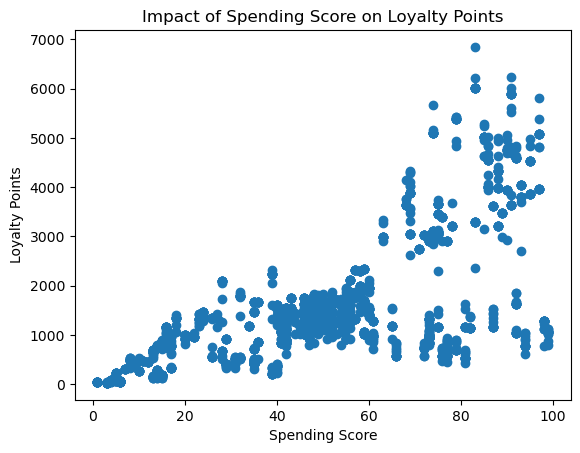

In [10]:
# Define the dependent variable.
y = reviews['loyalty_points']  

# Define the independent variable.
x = reviews[['spending_score']]

# Check for homoscedasticity with Matplotlib.
plt.scatter(x, y)
plt.title('Impact of Spending Score on Loyalty Points')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# Run the OLS model on the data.
f = 'y ~ x'

test = ols(f, data = reviews).fit()

# Print the regression table
test.summary()

**Observations**  
For every 1 unit increase in spending there is a 33 unit increase in loyalty points  
P value is 0 - spending score has a significant impact on loyalty points
R-squared is 0.45 - so spending explains 45% of the variability in loyalty points.
Shape of the graph indicates heteroscedasticity - the more the spending score is the more varied loyalty points are. 

In [11]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted valuess: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted valuess:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient to 33.061693 and the constant to -75.052663 and generate the regression table.
y_pred = (-75.052663) + 33.061693 * reviews['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

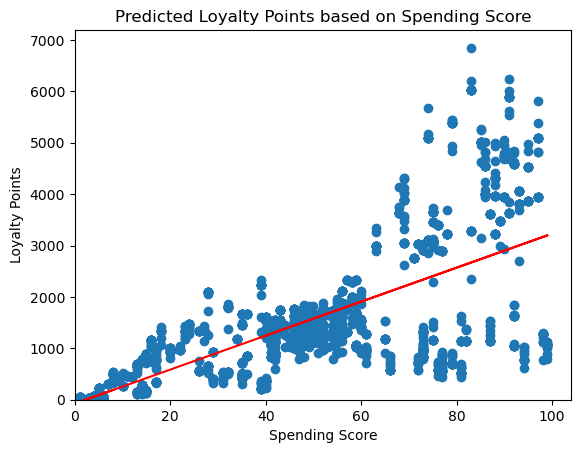

In [13]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='red')

plt.xlim(0)
plt.ylim(0)

plt.title('Predicted Loyalty Points based on Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

### 5b) Remuneration vs loyalty points

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        10:44:13   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

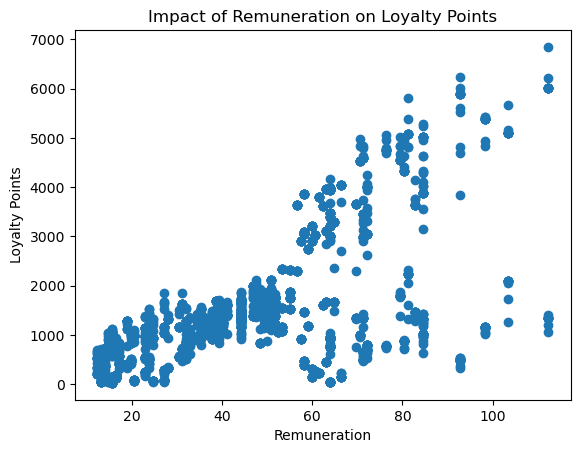

In [14]:
# Define the dependent variable.
y = reviews['loyalty_points']  

# Define the independent variable.
x = reviews[['remuneration']]

# Check for homoscedasticity with Matplotlib.
plt.scatter(x, y)
plt.title('Impact of Remuneration on Loyalty Points')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

# Run the OLS model on the data.
f = 'y ~ x'

test_remun = ols(f, data = reviews).fit()

# Print the regression table
test_remun.summary()

**Observations**  
For every 1 unit increase in remuneration (measured in 1000s) there is a 34 unit increase in loyalty points  
P value is 0 - so remuneration also has a significant impact on loyalty points
R-squared is 0.38 - so spending explains 38% of the variability in loyalty points (less than spending score)
Shape of the graph indicates heteroscedasticity - the more the remuneration is the more varied loyalty points are.

In [15]:
# Extract the estimated parameters.
print("Parameters: ", test_remun.params)

# Extract the standard errors.
print("Standard errors: ", test_remun.bse)

# Extract the predicted values.
print("Predicted values: ", test_remun.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
# Set the X coefficient to 34.187825 and the constant to -65.686513 and generate the regression table.
y_pred2 = (-65.686513) + 34.187825 * reviews['remuneration']

# View the output.
y_pred2

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

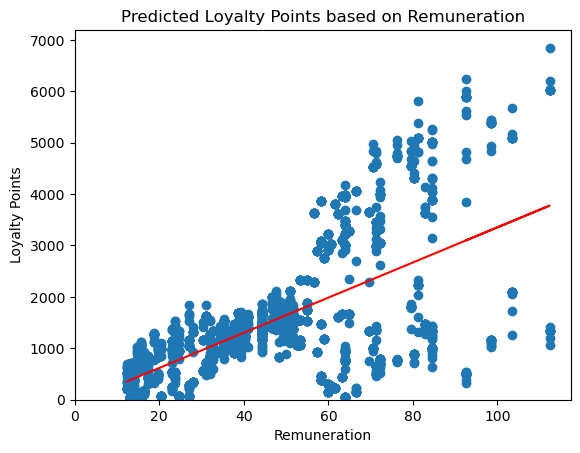

In [17]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred2, color='red')

plt.xlim(0)
plt.ylim(0)

plt.title('Predicted Loyalty Points based on Remuneration')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Jul 2023   Prob (F-statistic):             0.0577
Time:                        10:44:13   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

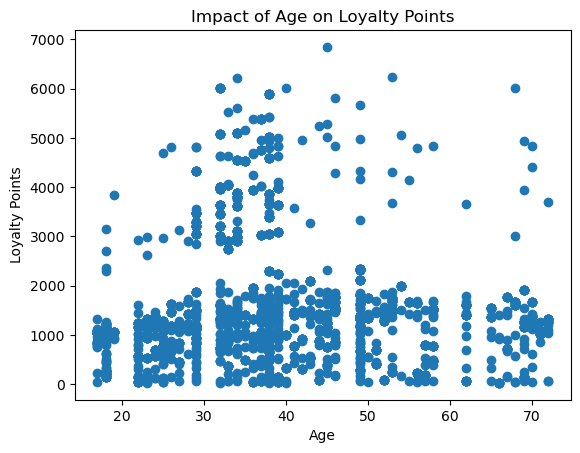

In [18]:
# Define the dependent variable.
y = reviews['loyalty_points']  

# Define the independent variable.
x = reviews[['age']]

# Check for homoscedasticity with Matplotlib.
plt.scatter(x, y)
plt.title('Impact of Age on Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

# Run the OLS model on the data.
f = 'y ~ x'

test_age = ols(f, data = reviews).fit()

# Print the regression table
test_age.summary()

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test_age.params)

# Extract the standard errors.
print("Standard errors: ", test_age.bse)

# Extract the predicted values.
print("Predicted values: ", test_age.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [20]:
# Set the X coefficient to  -4.012805 and the constant to  1736.517739 and generate the regression table.
y_pred3 = (1736.517739) +  -4.012805 * reviews['age']

# View the output.
y_pred3

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

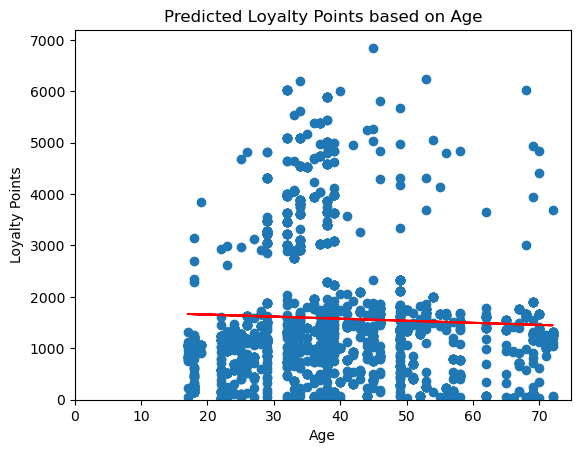

In [21]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred3, color='red')

plt.xlim(0)
plt.ylim(0)

plt.title('Predicted Loyalty Points based on Age')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

## 6. Observations and insights

***Your observations here...***






**See README file in github for full summary**

- Age, remuneration and spending score all are significant in impact on loyalty points.
- spending score has the highest impact on the change in loyalty points at 45%, however based on meta description spending_score is too closely linked to loyalty_points (both based on spend) to be independent
- Increase in spending score or remuneration can be used to predict an increase in loyalty points
- Spending score and remuneration versus Loyalty points show heteroscedasticity.
- As age increases loyalty points start to decrease


Next steps:
- multiple linear regression to see how they all work together
- check vif to see if there is overlap
- convert education and gender to dummy variables to check if they have an impact

## 7. Multiple linear regression

In [22]:
# import libraries
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [140]:
# Load the CSV file - renamed
reviews = pd.read_csv('reviews2.csv')  

# Print the DataFrame.
reviews.head() 

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [141]:
# Drop unnecessary columns review and summary
remove_cols = ['review', 'summary']
reviews = reviews.drop(remove_cols, axis=1)

# View column names.
print(list(reviews.columns))

['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product']


### Create dummy variables for education and gender

In [142]:
# Check all possible options for gender
reviews['gender'].value_counts()

Female    1120
Male       880
Name: gender, dtype: int64

In [143]:
# Check all possible options for education
reviews['education'].value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

In [144]:
# replace education with a number
# import label encoder
# for labelencoder to make strings numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

# Specify education order
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

# Order lists of the values for the Edu column.
Edu_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']

# Create an instance of MyLabelEncoder.
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(Edu_order)

# Apply the LabelEncoder to the Edu column in the DataFrame.
reviews['education'] = reviews['education'].apply(lambda x: x if x in Edu_order else 'Basic')
reviews['education'] = le.transform(reviews['education'])

# View the DataFrame
print(reviews.head(15))

    gender  age  remuneration  spending_score  loyalty_points  education  \
0     Male   18         12.30              39             210          2   
1     Male   23         12.30              81             524          2   
2   Female   22         13.12               6              40          2   
3   Female   25         13.12              77             562          2   
4   Female   33         13.94              40             366          2   
5   Female   24         13.94              76             573          4   
6   Female   37         14.76               6              61          1   
7   Female   25         14.76              94             772          2   
8     Male   66         15.58               3              31          4   
9   Female   32         15.58              72             724          4   
10    Male   69         15.58              14             138          1   
11  Female   37         15.58              99            1067          3   
12  Female  

In [145]:
# Dummy variable for gender
gen_dummies = pd.get_dummies(reviews['gender'], prefix='gender', drop_first = True)
reviews = pd.concat([reviews, gen_dummies.astype(int)], axis=1)

# Drop unnecessary columns review and summary
remove_cols = ['gender']
reviews = reviews.drop(remove_cols, axis=1)

# View the updated DataFrame
print(reviews.head())

   age  remuneration  spending_score  loyalty_points  education  product  \
0   18         12.30              39             210          2      453   
1   23         12.30              81             524          2      466   
2   22         13.12               6              40          2      254   
3   25         13.12              77             562          2      263   
4   33         13.94              40             366          2      291   

   gender_Male  
0            1  
1            1  
2            0  
3            0  
4            0  


In [146]:
# Check for multicollinarity
# X is everything except loyalty points column
# y is loyalty points column
X = reviews.drop('loyalty_points', axis = 1)
y = reviews['loyalty_points']

# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the DataFrame.
vif_data.sort_values('VIF',ascending=True)

feature       VIF
5     gender_Male  1.779584
4         product  3.095847
2  spending_score  3.639222
1    remuneration  5.394751
3       education  5.451691
0             age  5.732423

**Observations**: all under 10 so no multicollinarity

In [147]:
# check for correlation
reviews.corr()

age  remuneration  spending_score  loyalty_points  \
age             1.000000     -0.005708       -0.224334       -0.042445   
remuneration   -0.005708      1.000000        0.005612        0.616065   
spending_score -0.224334      0.005612        1.000000        0.672310   
loyalty_points -0.042445      0.616065        0.672310        1.000000   
education      -0.028764      0.044935       -0.026693       -0.048050   
product         0.003081      0.305309       -0.001649        0.183600   
gender_Male     0.060452      0.038442       -0.029885       -0.020344   

                education   product  gender_Male  
age             -0.028764  0.003081     0.060452  
remuneration     0.044935  0.305309     0.038442  
spending_score  -0.026693 -0.001649    -0.029885  
loyalty_points  -0.048050  0.183600    -0.020344  
education        1.000000 -0.048936     0.046009  
product         -0.048936  1.000000     0.012078  
gender_Male      0.046009  0.012078     1.000000

In [148]:
# Define dependent variable
y = reviews['loyalty_points'] 

# independent variable
x = reviews[['remuneration', 'age']]

In [149]:
# Fit regression model
mlr = linear_model.LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [150]:
# show predictions for x
mlr.predict(x)

array([ 434.37626706,  415.97400933,  447.67836569, ..., 3121.8317145 ,
       3317.99904823, 3129.1926176 ])

In [151]:
# Print the R-squared value.
print("R-squared: ", mlr.score(x,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(x, mlr.coef_))  

R-squared:  0.3810512098439913
Intercept:  80.26582263201067
Coefficients:


[('remuneration', 34.17549368082213), ('age', -3.6804515468256414)]

In [152]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [153]:
# Training the model
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     523.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.25e-175
Time:                        10:50:06   Log-Likelihood:                -13321.
No. Observations:                1600   AIC:                         2.665e+04
Df Residuals:                    1597   BIC:                         2.666e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           77.9654     92.545      0.842   

In [154]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [155]:
# Call the predictions for x in the train set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [2411.29864888  887.38705709  582.66181481 ... 1095.68068082 1178.90521631
 1940.61545335]


In [156]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)  

31.76746271240788


In [157]:
# evaluate the model
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 752.344288188921
Mean Square Error (Final): 1106508.3572088662


**Observations** these errors seem high in predicting loyalty points. Might be worth reviewing with another model or transforming the data to create comparison models.

**Observations**: remuneration, spending score, product and age have the biggest impact on loyalty points. Education and gender have a very small impact. 38% of variation in loyalty points can be explained by remuneration and age.
**See README file in github for full summary**


# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [35]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [36]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews2.csv')

# View DataFrame.
df2.head(10)

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   
5  Female   24         13.94              76             573       PhD   
6  Female   37         14.76               6              61   diploma   
7  Female   25         14.76              94             772  graduate   
8    Male   66         15.58               3              31       PhD   
9  Female   32         15.58              72             724       PhD   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   
5      977                                     Grandson loves   
6      979  I have bought many gm screens over the years, ...   
7     1012                         Came in perfect condition.   
8     1031  Could be better but its still great. I love th...   
9     1459  My review will mirror others in that this kind...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap  
5                                         Five Stars  
6                                Best gm screen ever  
7                                         Five Stars  
8                     Great but could be even better  
9  Another missed opportunity.  Not a value add t...

In [37]:
# Drop unnecessary columns.
df3 = df2.drop(columns=['gender', 'age', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df3.head()

remuneration  spending_score  loyalty_points
0         12.30              39             210
1         12.30              81             524
2         13.12               6              40
3         13.12              77             562
4         13.94              40             366

In [38]:
# Explore the data.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
 2   loyalty_points  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


In [39]:
# Descriptive statistics.
df3.describe()

remuneration  spending_score  loyalty_points
count   2000.000000     2000.000000     2000.000000
mean      48.079060       50.000000     1578.032000
std       23.123984       26.094702     1283.239705
min       12.300000        1.000000       25.000000
25%       30.340000       32.000000      772.000000
50%       47.150000       50.000000     1276.000000
75%       63.960000       73.000000     1751.250000
max      112.340000       99.000000     6847.000000

## 2. Plot

## a) Remuneration as x

Text(0, 0.5, 'Loyalty Points')

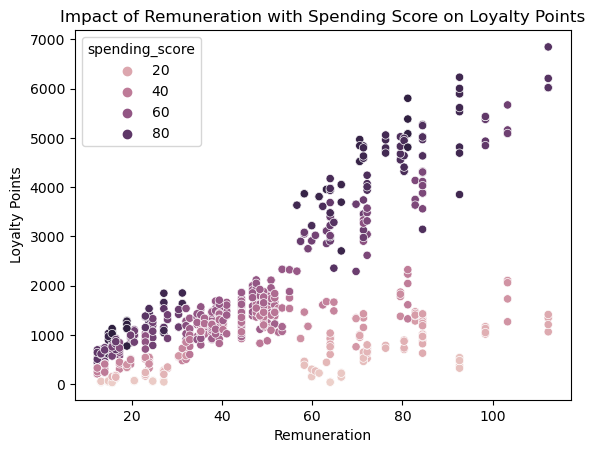

In [40]:
# Create a scatterplot
sns.scatterplot(x='remuneration',
                y='loyalty_points',
                data=df3,
                hue='spending_score')

plt.title('Impact of Remuneration with Spending Score on Loyalty Points')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

Text(0.5, 1.05, 'Pairplot with Remuneration, Spending Score & Loyalty Points')

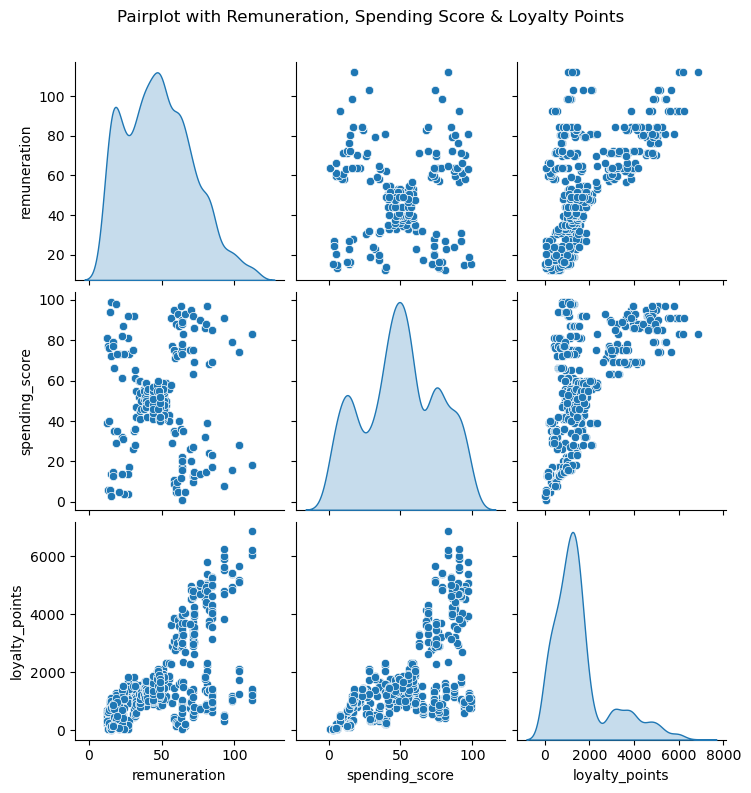

In [41]:
# Create a pairplot with Seaborn.
x = df3[['remuneration', 'spending_score', 'loyalty_points']]

sns.pairplot(df3,
             vars=x,
             diag_kind='kde')
plt.suptitle("Pairplot with Remuneration, Spending Score & Loyalty Points", y=1.05)

### b) x as spending score 

Text(0, 0.5, 'Loyalty Points')

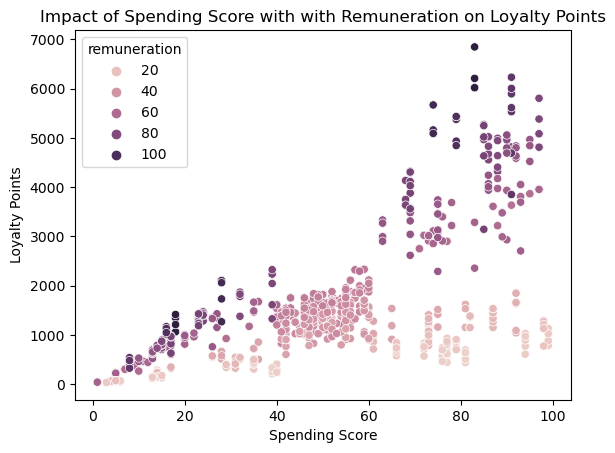

In [42]:
# Create a scatterplot
sns.scatterplot(x='spending_score',
                y='loyalty_points',
                data=df3,
                hue='remuneration')
# Add title and labels:
plt.title('Impact of Spending Score with with Remuneration on Loyalty Points')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

## 3. Elbow and silhoutte methods

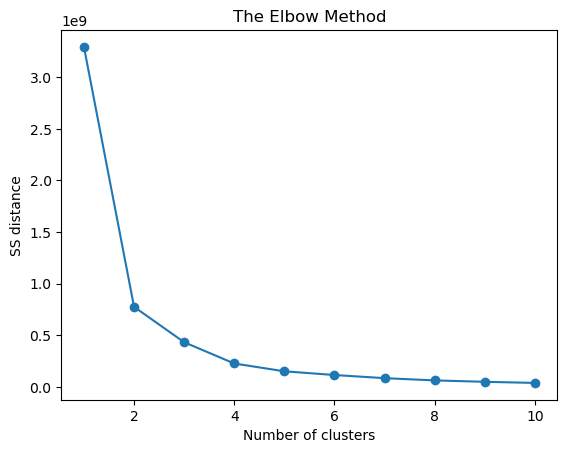

In [43]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

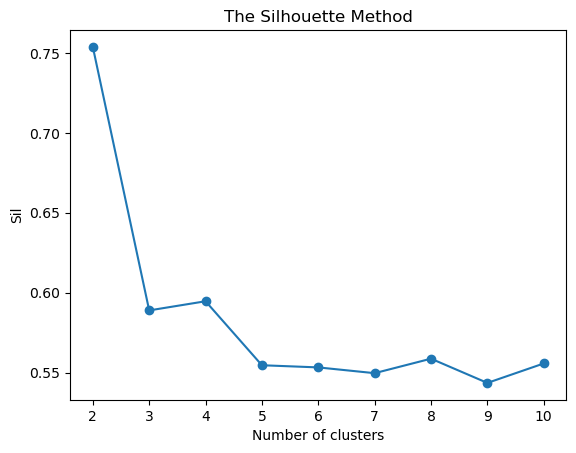

In [44]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

**Observations** Elbow indicates 3 or 4 clusters, silhouette seems to indicate 4 clusters would be best.

## 4. Evaluate k-means model at different values of *k*

## a) 3 clusters

Text(0.5, 1.02, 'Three clusters')

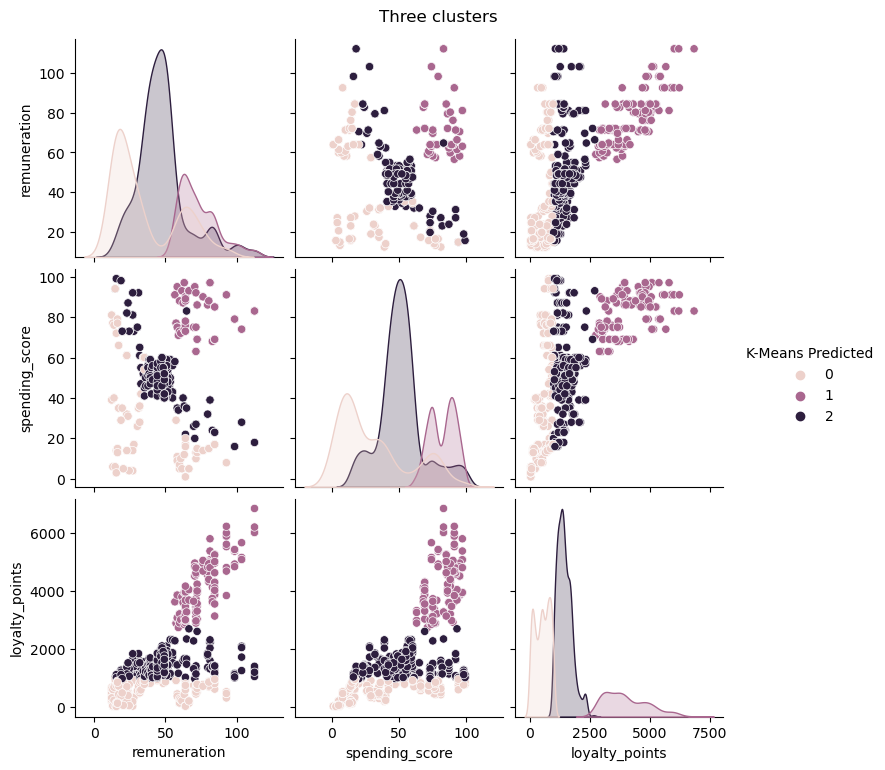

In [45]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# title
plt.suptitle("Three clusters", y=1.02)


In [46]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    977
0    671
1    352
Name: K-Means Predicted, dtype: int64

## b) 4 clusters

Text(0.5, 1.02, 'Four clusters')

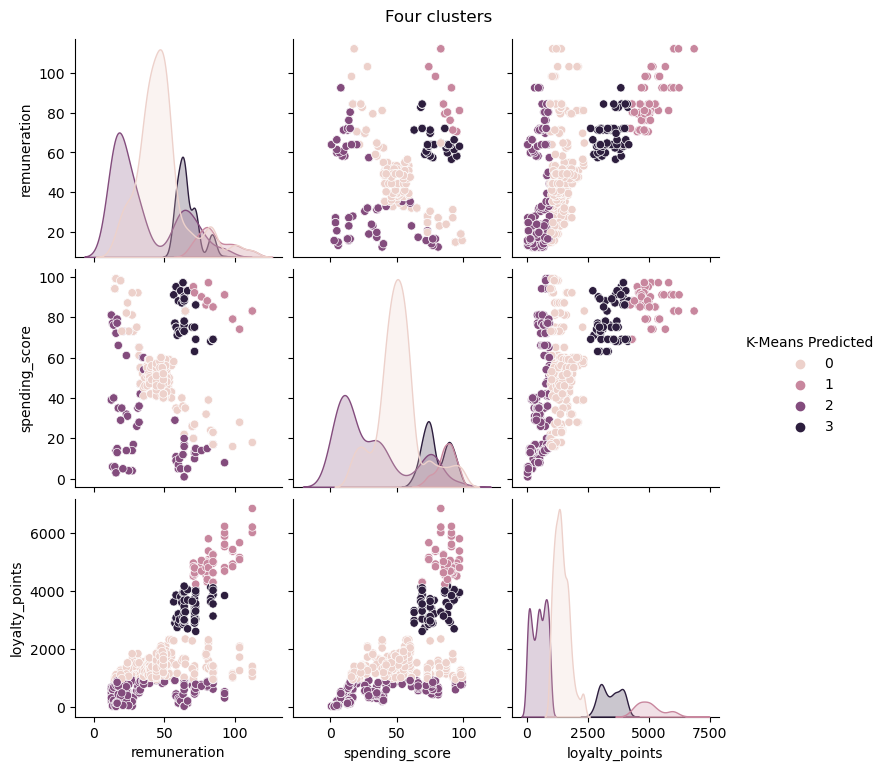

In [47]:
# Use fourclusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

plt.suptitle("Four clusters", y=1.02)


In [48]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    994
2    652
3    230
1    124
Name: K-Means Predicted, dtype: int64

## c) 5 clusters

Text(0.5, 1.02, 'Five clusters')

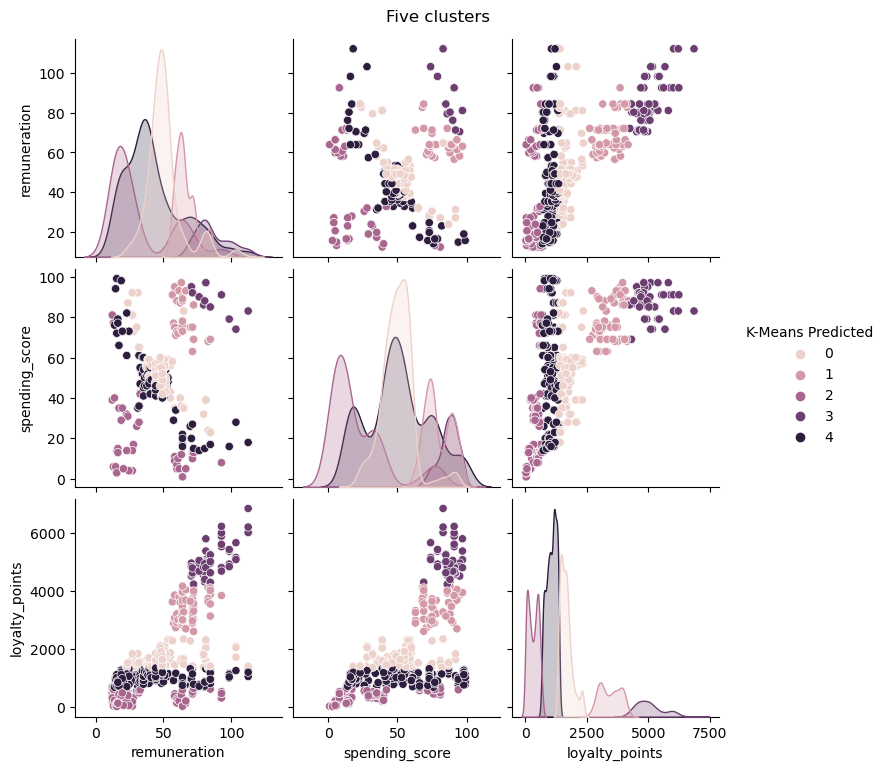

In [49]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

plt.suptitle("Five clusters", y=1.02)


In [50]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

4    701
0    521
2    424
1    230
3    124
Name: K-Means Predicted, dtype: int64

In [51]:
# Import libraries required for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
%matplotlib inline

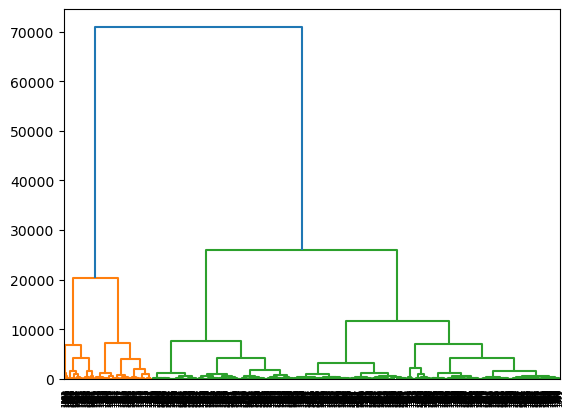

In [52]:
# Create dendrogram to be evaluated
dendro = dendrogram(linkage(x, method  = "ward"))
plt.show()

## 5. Fit final model and justify your choice

Chosen 3 clusters as balance is much closer (4 clusters leads to very unbalanced groups) and pairplots show enough difference between groups. Additionally as we are choosing a group to market to it's better if there are bigger groups (rather than multiple small groups) as long as there is enough overlap for the campaigns to work for a bigger group.

Text(0.5, 1.02, 'Three clusters')

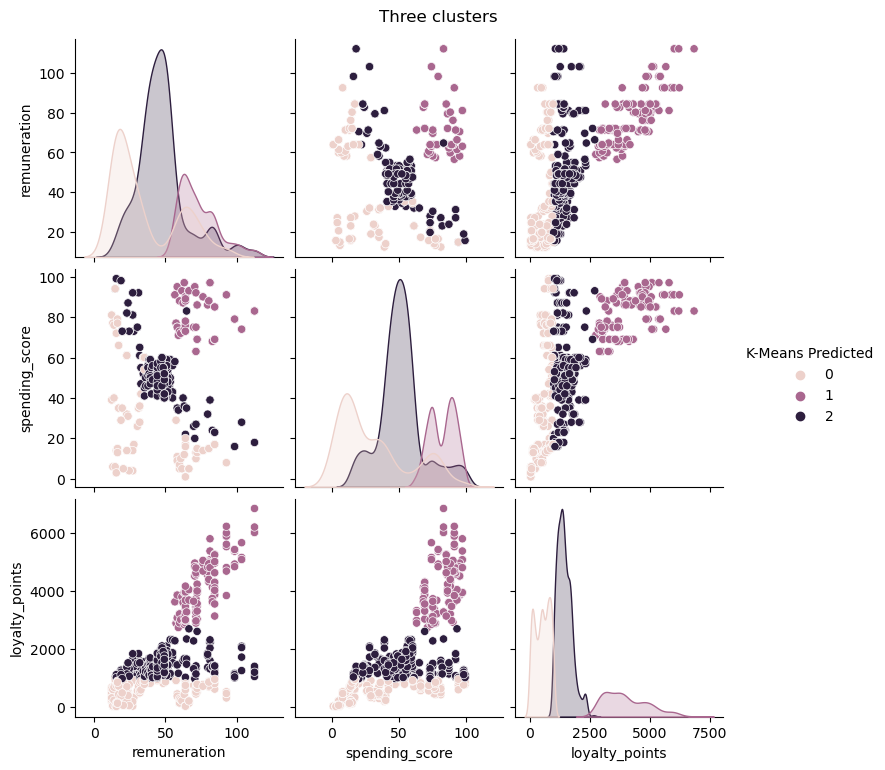

In [53]:
# Apply the final model.
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

plt.suptitle("Three clusters", y=1.02)

In [54]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    977
0    671
1    352
Name: K-Means Predicted, dtype: int64

In [55]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  loyalty_points  K-Means Predicted
0         12.30              39             210                  0
1         12.30              81             524                  0
2         13.12               6              40                  0
3         13.12              77             562                  0
4         13.94              40             366                  0


In [56]:
# Find the minimum and maximum values for each based on group 1
min_value = x.loc[x['K-Means Predicted'] == 1].min()
max_value = x.loc[x['K-Means Predicted'] == 1].max()

# Print the minimum and maximum values
print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: remuneration           56.58
spending_score         63.00
loyalty_points       2750.00
K-Means Predicted       1.00
dtype: float64
Maximum value: remuneration          112.34
spending_score         97.00
loyalty_points       6847.00
K-Means Predicted       1.00
dtype: float64


## 6. Plot and interpret the clusters

   remuneration  spending_score  loyalty_points  K-Means Predicted
0         12.30              39             210                  0
1         12.30              81             524                  0
2         13.12               6              40                  0
3         13.12              77             562                  0
4         13.94              40             366                  0


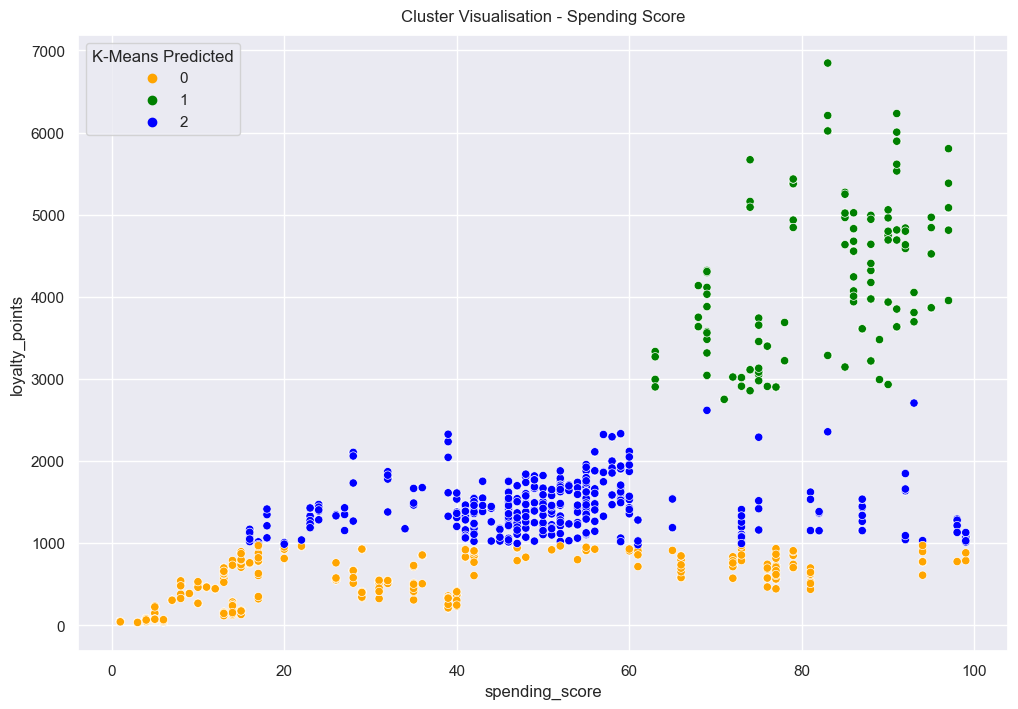

In [57]:
# Visualising the clusters - spending score
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score', 
                y ='loyalty_points',
                data=x,
                hue='K-Means Predicted',
                palette=['orange', 'green', 'blue'])

# Chart title
plt.title("Cluster Visualisation - Spending Score", loc='center', pad=10)

# View the DataFrame.
print(x.head())

   remuneration  spending_score  loyalty_points  K-Means Predicted
0         12.30              39             210                  0
1         12.30              81             524                  0
2         13.12               6              40                  0
3         13.12              77             562                  0
4         13.94              40             366                  0


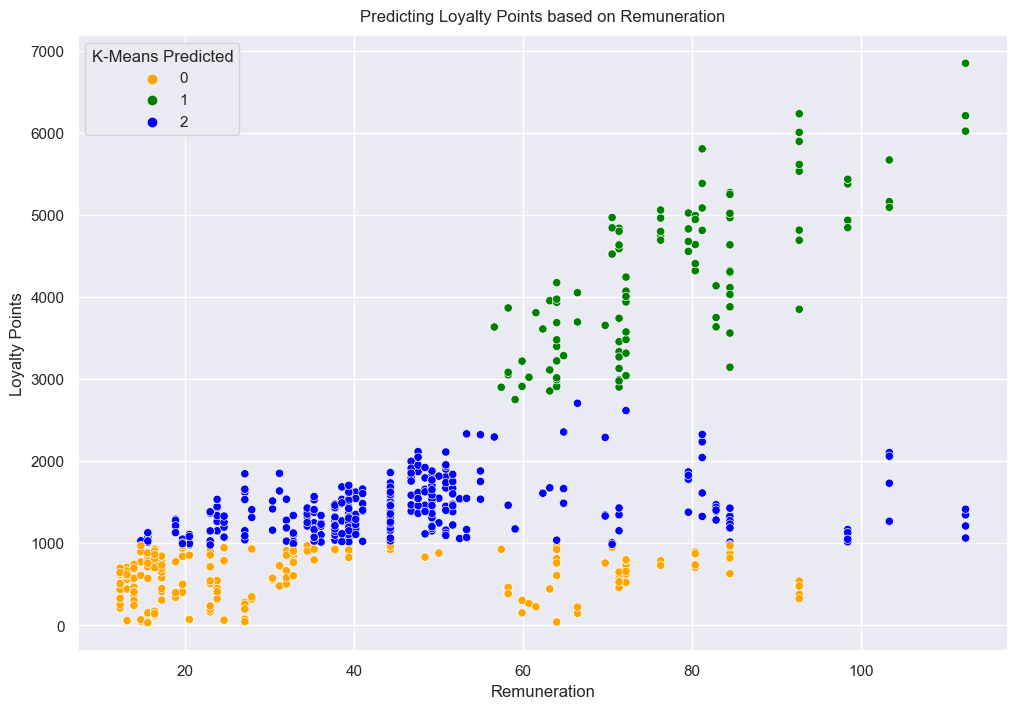

In [58]:
# Visualising the clusters - remuneration
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration', 
                y ='loyalty_points',
                data=x,
                hue='K-Means Predicted',
                palette=['orange', 'green', 'blue'])

# Chart title
plt.title("Predicting Loyalty Points based on Remuneration", loc='center', pad=10)
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")


# View the DataFrame.
print(x.head())

In [59]:
# Filter the data where 'K-Means Predicted' is equal to 1
cluster_1_data = x[x['K-Means Predicted'] == 1]

# Describe the statistics of the filtered data
description_cluster_1 = cluster_1_data.describe()

# View the statistics
print(description_cluster_1)

       remuneration  spending_score  loyalty_points  K-Means Predicted
count    352.000000      352.000000      352.000000              352.0
mean      73.296818       82.031250     4005.250000                1.0
std       13.620997        9.344111      888.912345                0.0
min       56.580000       63.000000     2750.000000                1.0
25%       63.140000       74.000000     3221.000000                1.0
50%       71.340000       84.000000     3866.000000                1.0
75%       81.180000       90.000000     4636.000000                1.0
max      112.340000       97.000000     6847.000000                1.0


**Observations**: Focus on remuneration £56.58k-£112.34k

## 7. Discuss: Insights and observations

***Your observations here...***

**See README file in github for full summary**

- Loyalty points seem to fit best into 3 groups - for both spending score and remuneration
- All 3 groups have outliers which are confusing the cluster and stretching the cluster horizontally
- group 1 shows the most compact cluster indicating remuneration variables to maximise loyalty points.
- Used remunertaion as the base as it's an independent variable, whereas spending_score and loyalty points both use spend in calculation.

Group 1
Remuneration group 1 is £56-112k
Spending score is 63-97

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

In [60]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Import along with matplotlib and seaborn for visualisation.
import matplotlib.pyplot as plt 
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alex_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# Load the data set as df3.
df3 = pd.read_csv('reviews2.csv')

# View DataFrame.
df3.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## Summary

In [62]:
# Drop unnecessary columns.
df3 = df3.drop(columns=['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product', 'review'])

# View DataFrame.
df3.head()

summary
0  The fact that 50% of this space is wasted on a...
1  Another worthless Dungeon Master's screen from...
2                    pretty, but also pretty useless
3                                         Five Stars
4                                         Money trap

In [63]:
# Drop duplicates
df3 = df3.drop_duplicates(subset=['summary'])

# Preview data.
df3.reset_index(inplace=True)
df3.head()

index                                            summary
0      0  The fact that 50% of this space is wasted on a...
1      1  Another worthless Dungeon Master's screen from...
2      2                    pretty, but also pretty useless
3      3                                         Five Stars
4      4                                         Money trap

In [64]:
# Remove punctuation.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    The fact that 50 of this space is wasted on ar...
1    Another worthless Dungeon Masters screen from ...
2                       pretty but also pretty useless
3                                           Five Stars
4                                           Money trap
Name: summary, dtype: object

In [65]:
# Transform data to lowercase.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [66]:
# Drop duplicates
df3 = df3.drop_duplicates(subset=['summary'])

# Preview data.
df3.reset_index(inplace=True)
df3.head()

level_0  index                                            summary
0        0      0  the fact that 50 of this space is wasted on ar...
1        1      1  another worthless dungeon masters screen from ...
2        2      2                     pretty but also pretty useless
3        3      3                                         five stars
4        4      4                                         money trap

In [67]:
# String all the comments together in a single variable.
all_summary = ''
for i in range(df3.shape[0]):
    # Add each comment.
    all_summary = all_summary + df3['summary'][i]

In [68]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

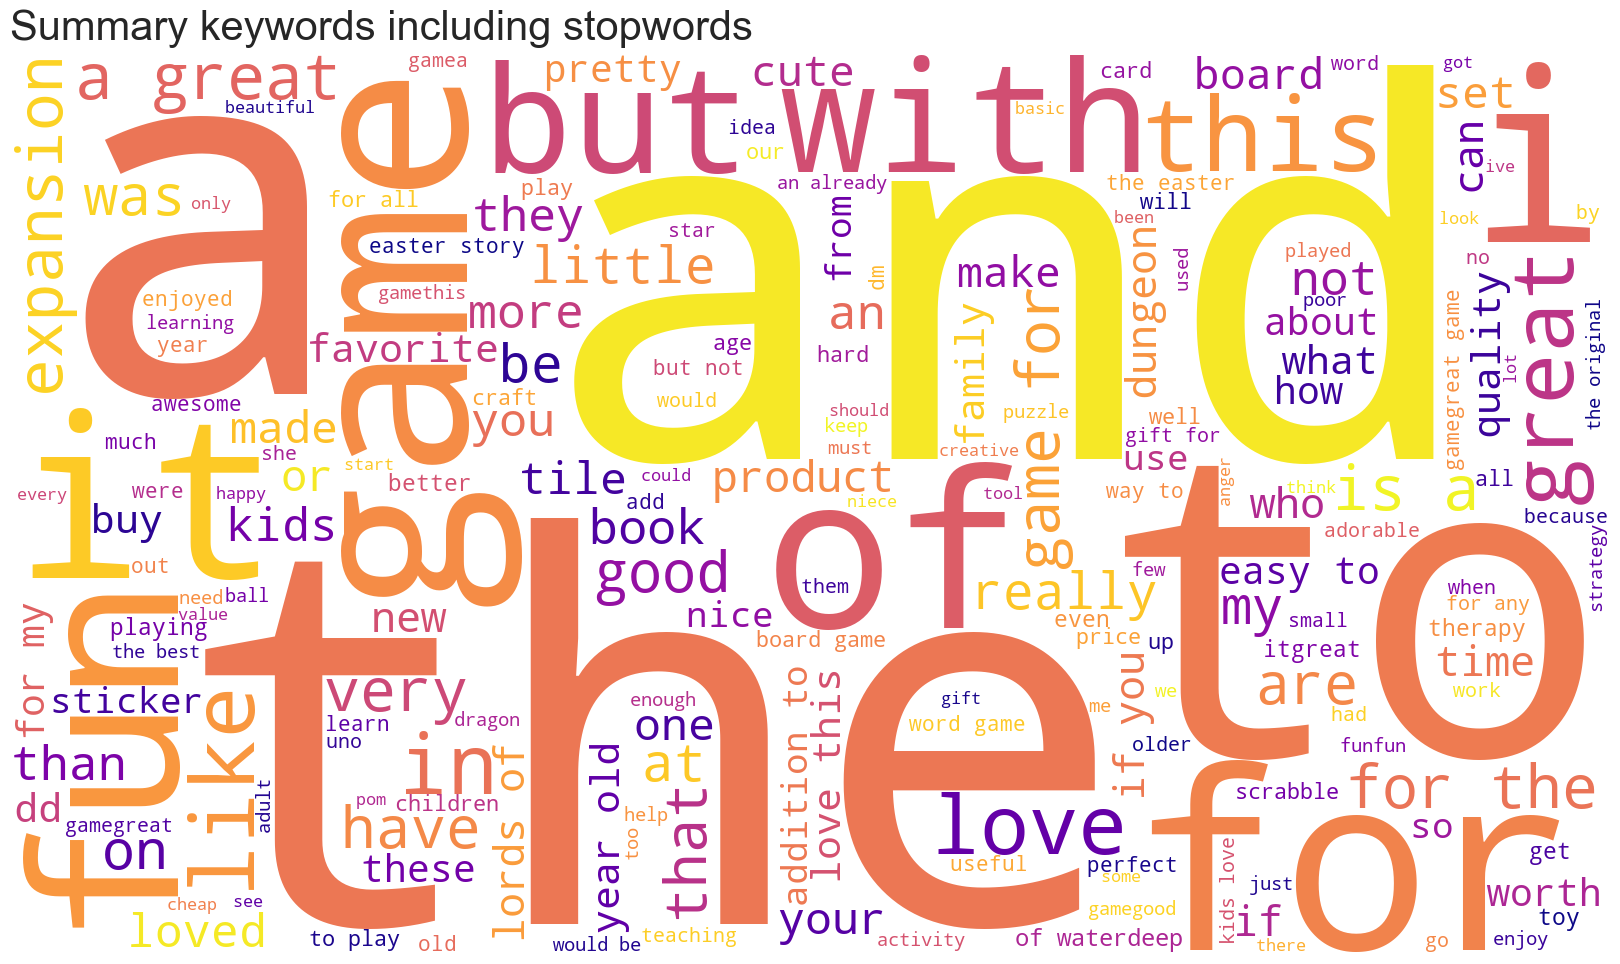

In [69]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('Summary keywords including stopwords', fontsize=30, loc='left', pad=10)
plt.show()

In [70]:
# Tokenise the words.
df3['tokens'] = df3['summary'].apply(word_tokenize)

# Preview data.
df3['tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

In [71]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df3.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df3['tokens'][i]

In [72]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'game': 267, 'the': 258, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [73]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [74]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alex_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


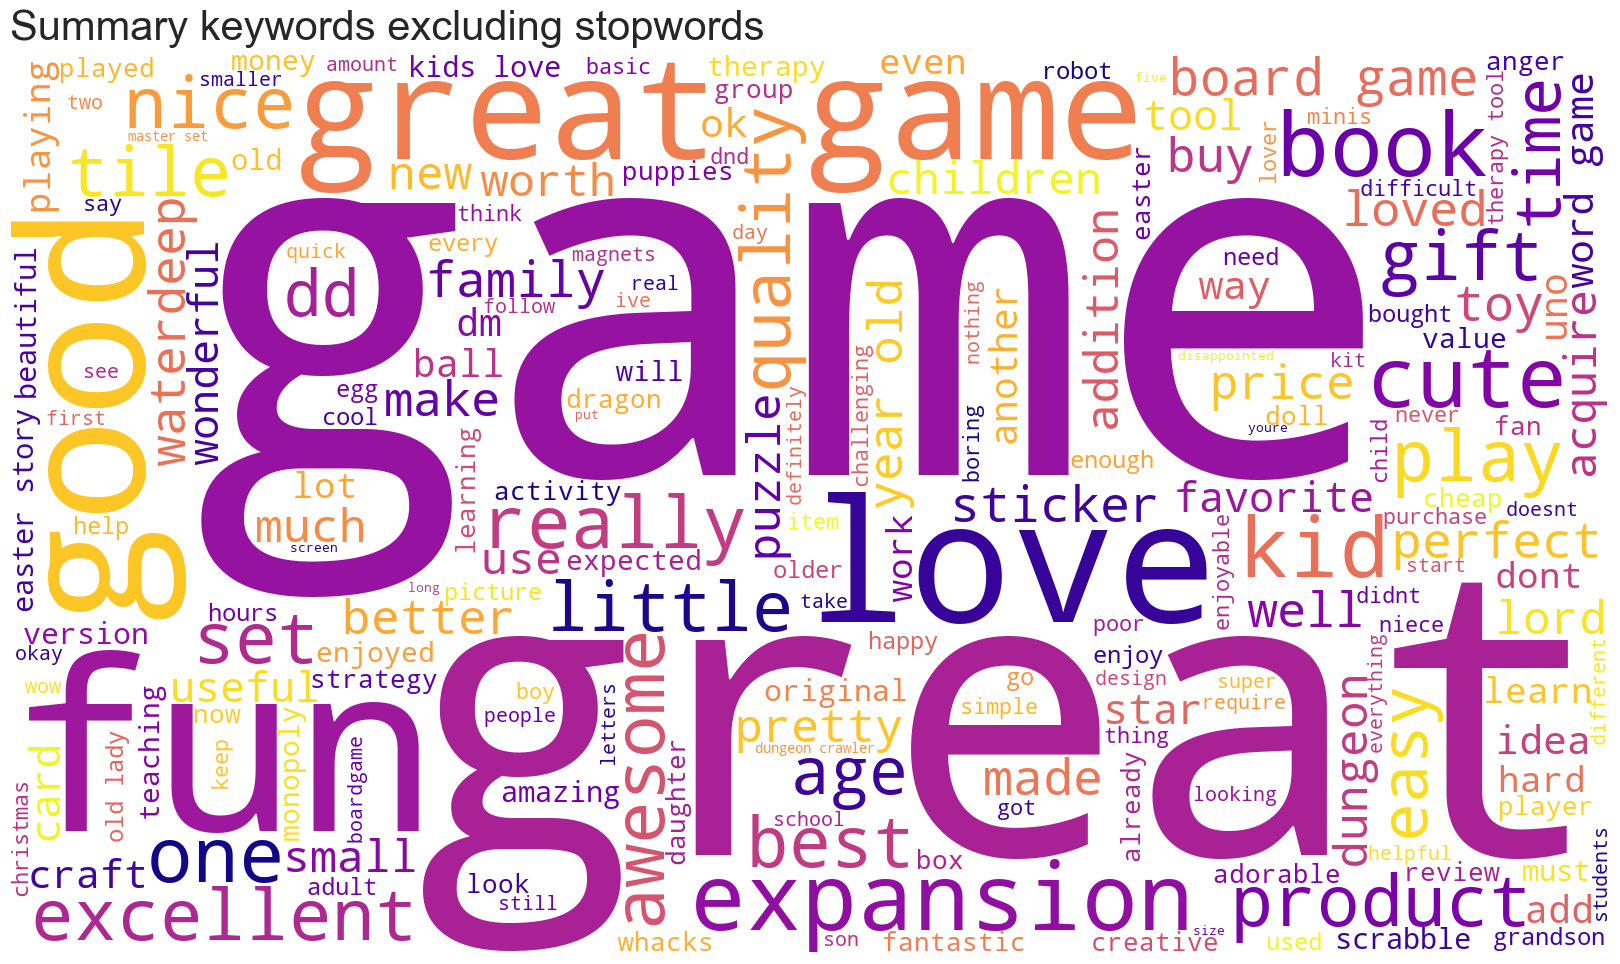

In [75]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('Summary keywords excluding stopwords', fontsize=30, loc='left', pad=10)
plt.show()

In [76]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word                
game             267
great            236
fun              175
good              84
love              69
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               30
nice              28
one               28

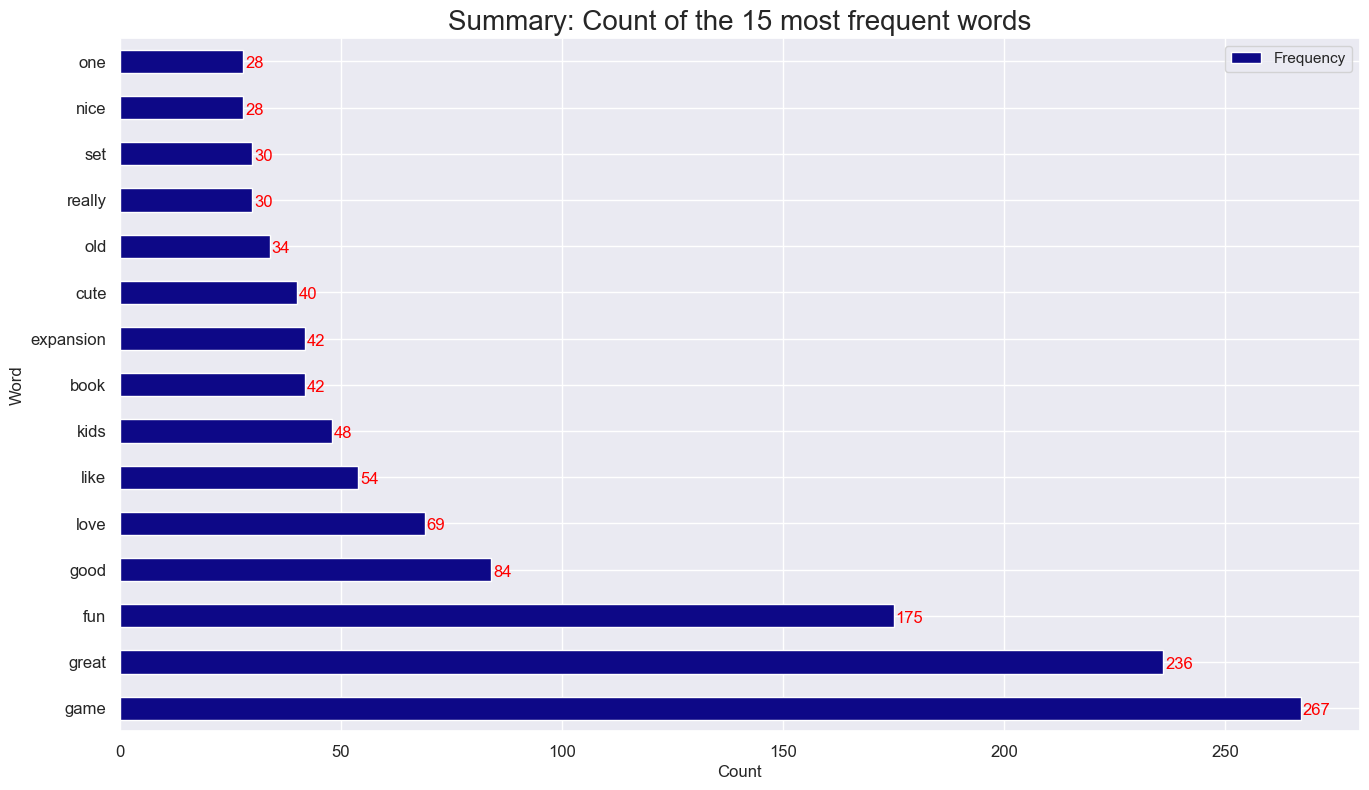

In [77]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [78]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df3['polarity'] = df3['summary'].apply(generate_polarity)

# Work out average polarity
average_polarity = df3['polarity'].mean()

# Preview the result.
print("Average Polarity Summary:", average_polarity)

Average Polarity Summary: 0.27166660449138247


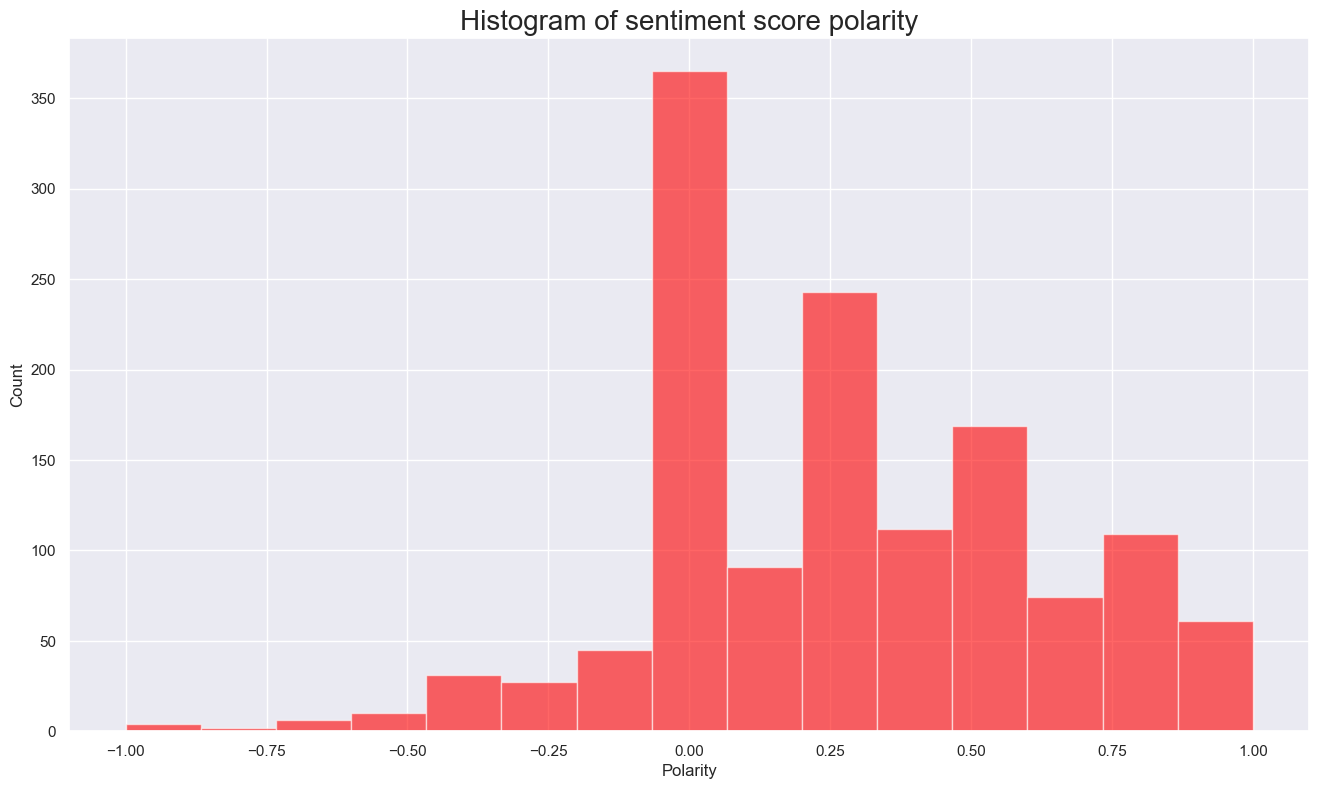

In [79]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative summaries respectively

In [80]:
# Create a DataFrame for most positive summary
positive_sentiment = df3.nlargest(20, 'polarity')
positive_sentiment.head(20)

level_0  index                                            summary  \
5          5      6                                best gm screen ever   
23        23     28                                  wonderful designs   
27        27     32                                            perfect   
61        61     80  theyre the perfect size to keep in the car or ...   
107      107    134                            perfect for preschooler   
112      113    140             awesome sticker activity for the price   
132      133    161                                       awesome book   
133      134    163                    he was very happy with his gift   
150      151    187                                            awesome   
166      169    210           awesome and welldesigned for 9 year olds   
337      345    475                                          excellent   
389      401    548                             excellent therapy tool   
407      420    580  the pigeon is the perfect addition to a school...   
423      436    599                          best easter teaching tool   
462      478    647                                          wonderful   
466      482    651              all f the mudpuppy toys are wonderful   
471      488    657                                     awesome puzzle   
476      493    662                               not the best quality   
514      534    724                                   excellent puzzle   
521      541    731                       the best feedback i can have   

                                                tokens  polarity  
5                             [best, gm, screen, ever]       1.0  
23                                [wonderful, designs]       1.0  
27                                           [perfect]       1.0  
61   [theyre, the, perfect, size, to, keep, in, the...       1.0  
107                        [perfect, for, preschooler]       1.0  
112      [awesome, sticker, activity, for, the, price]       1.0  
132                                    [awesome, book]       1.0  
133            [he, was, very, happy, with, his, gift]       1.0  
150                                          [awesome]       1.0  
166   [awesome, and, welldesigned, for, 9, year, olds]       1.0  
337                                        [excellent]       1.0  
389                         [excellent, therapy, tool]       1.0  
407  [the, pigeon, is, the, perfect, addition, to, ...       1.0  
423                     [best, easter, teaching, tool]       1.0  
462                                        [wonderful]       1.0  
466      [all, f, the, mudpuppy, toys, are, wonderful]       1.0  
471                                  [awesome, puzzle]       1.0  
476                          [not, the, best, quality]       1.0  
514                                [excellent, puzzle]       1.0  
521                [the, best, feedback, i, can, have]       1.0

In [81]:
# Check one to review how positive it is...
positive_sentiment.at[27, 'summary']

'perfect'

In [82]:
# Work out average polarity
average_polarity = df3['polarity'].mean()

# Preview the result.
print("Average Polarity Summary full text:", average_polarity)

Average Polarity Summary full text: 0.27166660449138247


In [83]:
# Create a DataFrame for most negative summary
negative_sentiment = df3.nsmallest(20, 'polarity')
negative_sentiment.head(20)

level_0  index                                            summary  \
17         17     21                      the worst value ive ever seen   
165       168    208    boring unless you are a craft person which i am   
587       611    829                                             boring   
837       876   1166  before this i hated running any rpg campaign d...   
1           1      1  another worthless dungeon masters screen from ...   
116       117    144                                       disappointed   
266       271    363  promotes anger instead of teaching calming met...   
634       660    885           too bad this is not what i was expecting   
637       665    890                       bad qualityall made of paper   
144       145    178     at age 31 i found these very difficult to make   
75         75    101                                   small and boring   
368       376    518                                         mad dragon   
575       599    805                                      disappointing   
723       755   1003  then you will find this board game to be dumb ...   
267       272    364                                 anger control game   
59         59     75                          really small disappointed   
360       368    504                              its uno for the angry   
646       674    899          50th anniversary is a sad day for acquire   
808       845   1119                          a disappointing coop game   
1116     1177   1605  its also really lame that the doll didnt come ...   

                                                 tokens  polarity  
17                 [the, worst, value, ive, ever, seen] -1.000000  
165   [boring, unless, you, are, a, craft, person, w... -1.000000  
587                                            [boring] -1.000000  
837   [before, this, i, hated, running, any, rpg, ca... -0.900000  
1     [another, worthless, dungeon, masters, screen,... -0.800000  
116                                      [disappointed] -0.750000  
266   [promotes, anger, instead, of, teaching, calmi... -0.700000  
634   [too, bad, this, is, not, what, i, was, expect... -0.700000  
637                  [bad, qualityall, made, of, paper] -0.700000  
144   [at, age, 31, i, found, these, very, difficult... -0.650000  
75                                 [small, and, boring] -0.625000  
368                                       [mad, dragon] -0.625000  
575                                     [disappointing] -0.600000  
723   [then, you, will, find, this, board, game, to,... -0.591667  
267                              [anger, control, game] -0.550000  
59                        [really, small, disappointed] -0.500000  
360                         [its, uno, for, the, angry] -0.500000  
646   [50th, anniversary, is, a, sad, day, for, acqu... -0.500000  
808                      [a, disappointing, coop, game] -0.500000  
1116  [its, also, really, lame, that, the, doll, did... -0.500000

## Reviews

In [84]:
# New df for reviews
df4 = pd.read_csv('reviews2.csv')
df4.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [85]:
# Drop unnecessary columns.
df4 = df4.drop(columns=['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product', 'summary'])

# View DataFrame.
df4.head()

review
0  When it comes to a DM's screen, the space on t...
1  An Open Letter to GaleForce9*:\n\nYour unpaint...
2  Nice art, nice printing.  Why two panels are f...
3  Amazing buy! Bought it as a gift for our new d...
4  As my review of GF9's previous screens these w...

In [86]:
# Remove punctuation.
df4['review'] = df4['review'].str.replace('[^\w\s]','')

# Preview the result.
df4['review'].head()

0    When it comes to a DMs screen the space on the...
1    An Open Letter to GaleForce9\n\nYour unpainted...
2    Nice art nice printing  Why two panels are fil...
3    Amazing buy Bought it as a gift for our new dm...
4    As my review of GF9s previous screens these we...
Name: review, dtype: object

In [87]:
# Transform data to lowercase.
df4['review'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [88]:
# Drop duplicates
df4 = df4.drop_duplicates(subset=['review'])

# Preview data.
df4.reset_index(inplace=True)
df4.head()

index                                             review
0      0  when it comes to a dms screen the space on the...
1      1  an open letter to galeforce9 your unpainted mi...
2      2  nice art nice printing why two panels are fill...
3      3  amazing buy bought it as a gift for our new dm...
4      4  as my review of gf9s previous screens these we...

In [89]:
# String all the comments together in a single variable.
all_review = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_review = all_review + df4['review'][i]

In [90]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

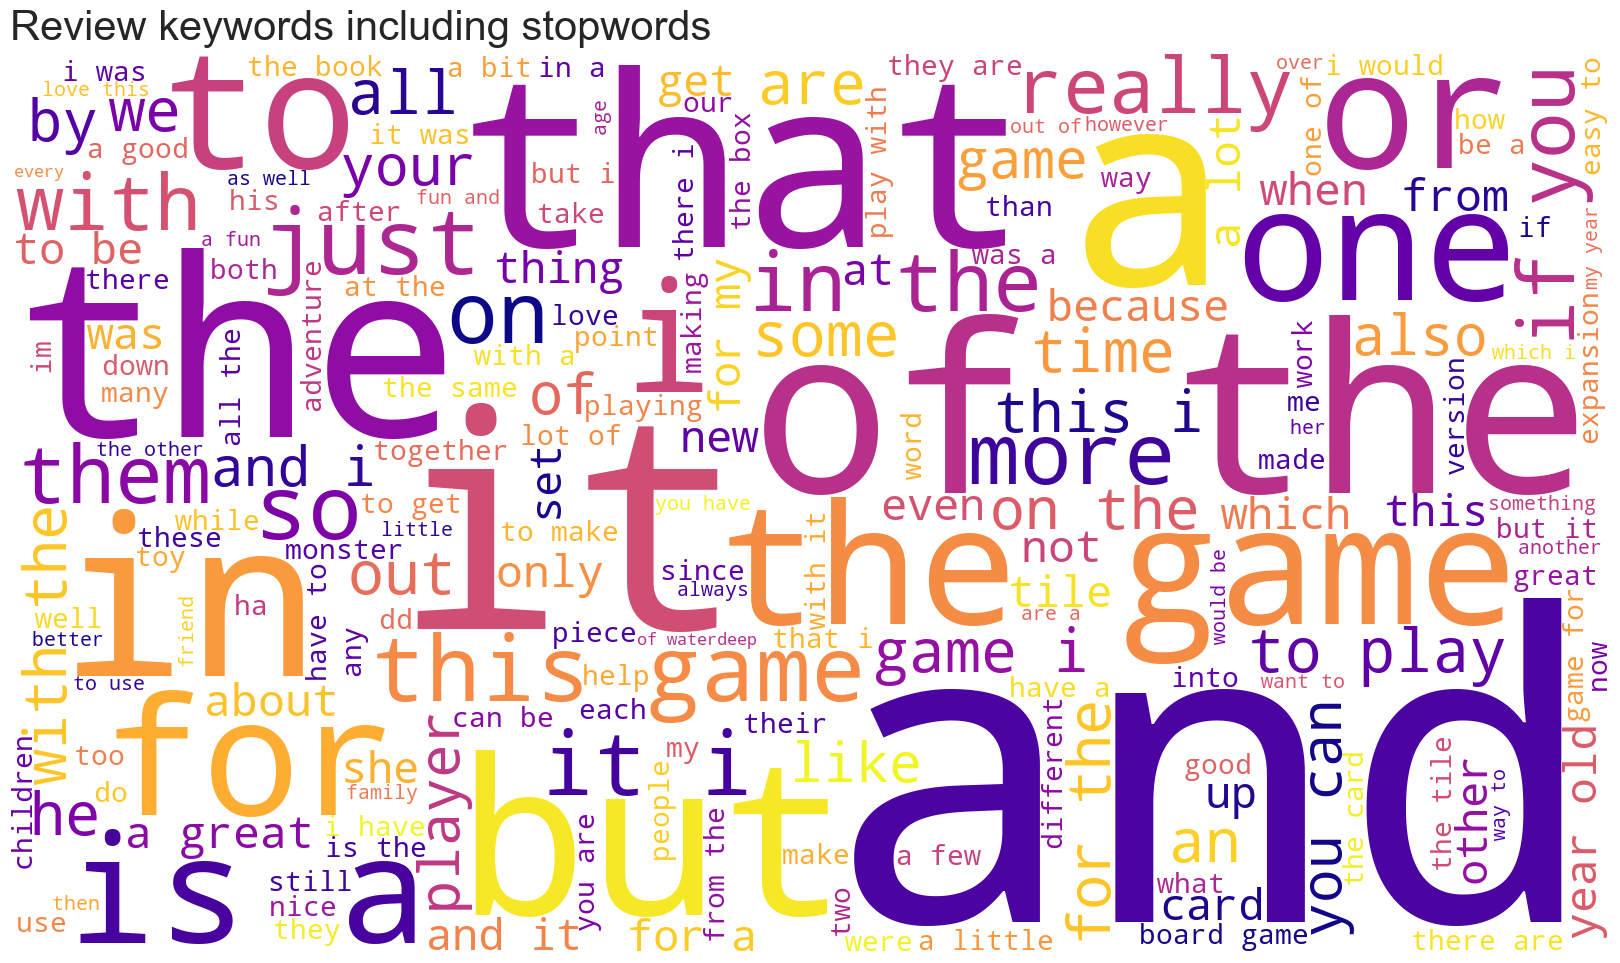

In [91]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('Review keywords including stopwords', fontsize=30, loc='left', pad=10)
plt.show()

In [92]:
# Tokenise the words.
df4['tokens'] = df4['review'].apply(word_tokenize)

# Preview data.
df4['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [93]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df4['tokens'][i]

In [94]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [95]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [96]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alex_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


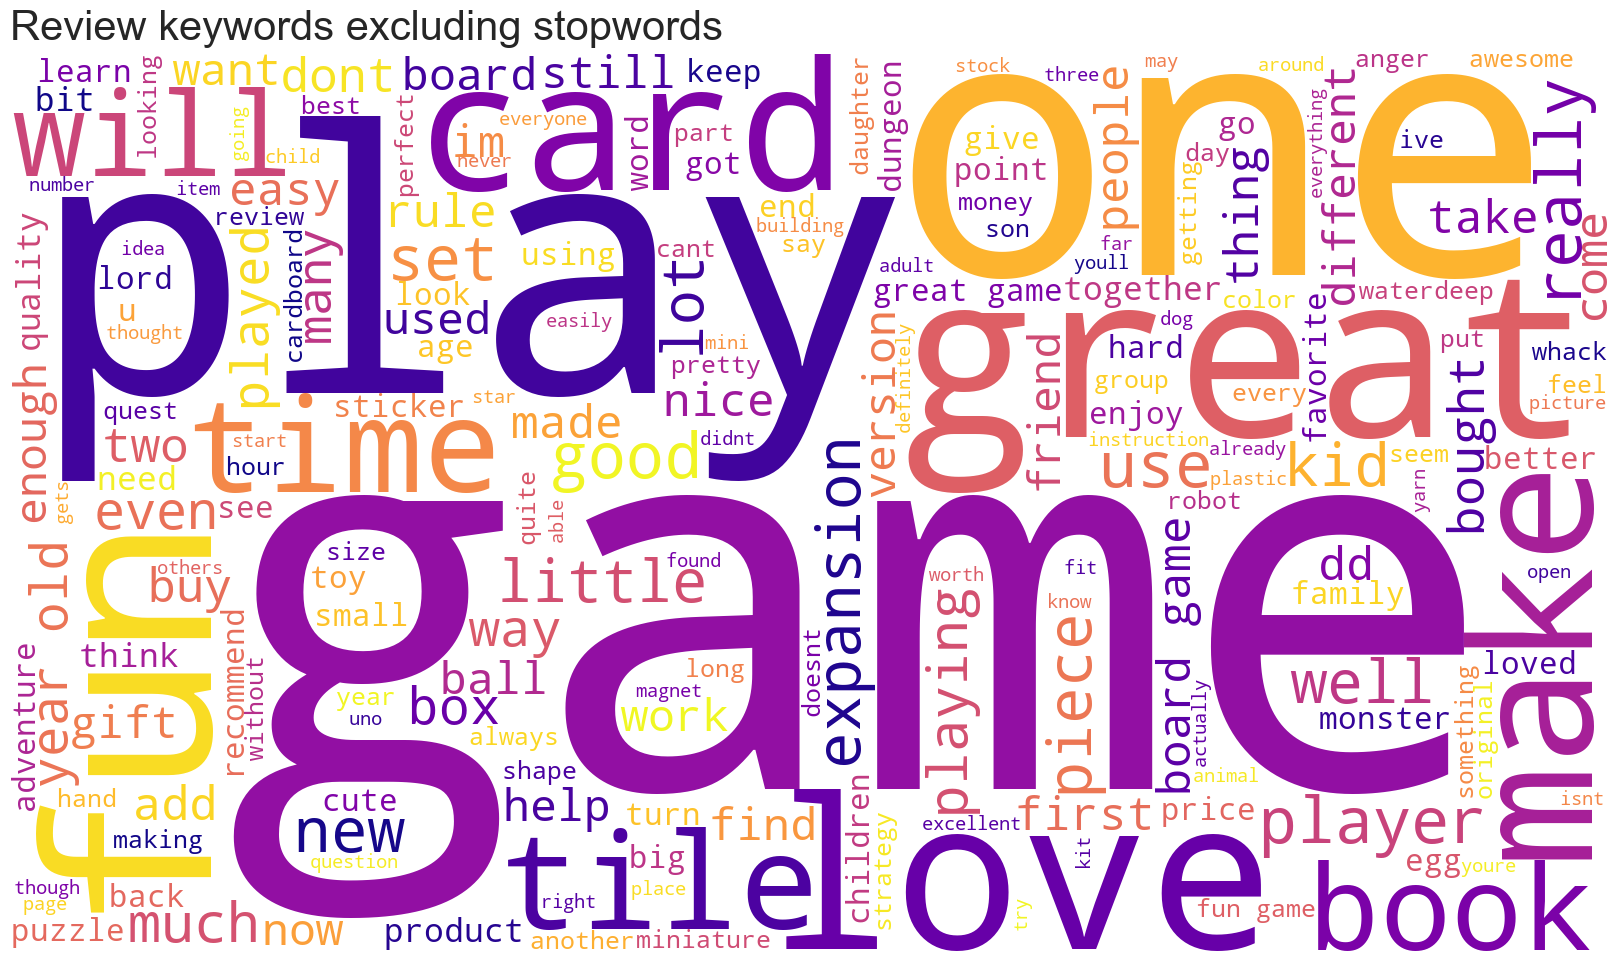

In [97]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('Review keywords excluding stopwords', fontsize=30, loc='left', pad=10)
plt.show()

In [98]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word             
game         1668
great         579
fun           549
one           530
play          502
like          414
love          322
really        319
get           319
cards         301
tiles         297
time          291
good          287
would         280
book          273

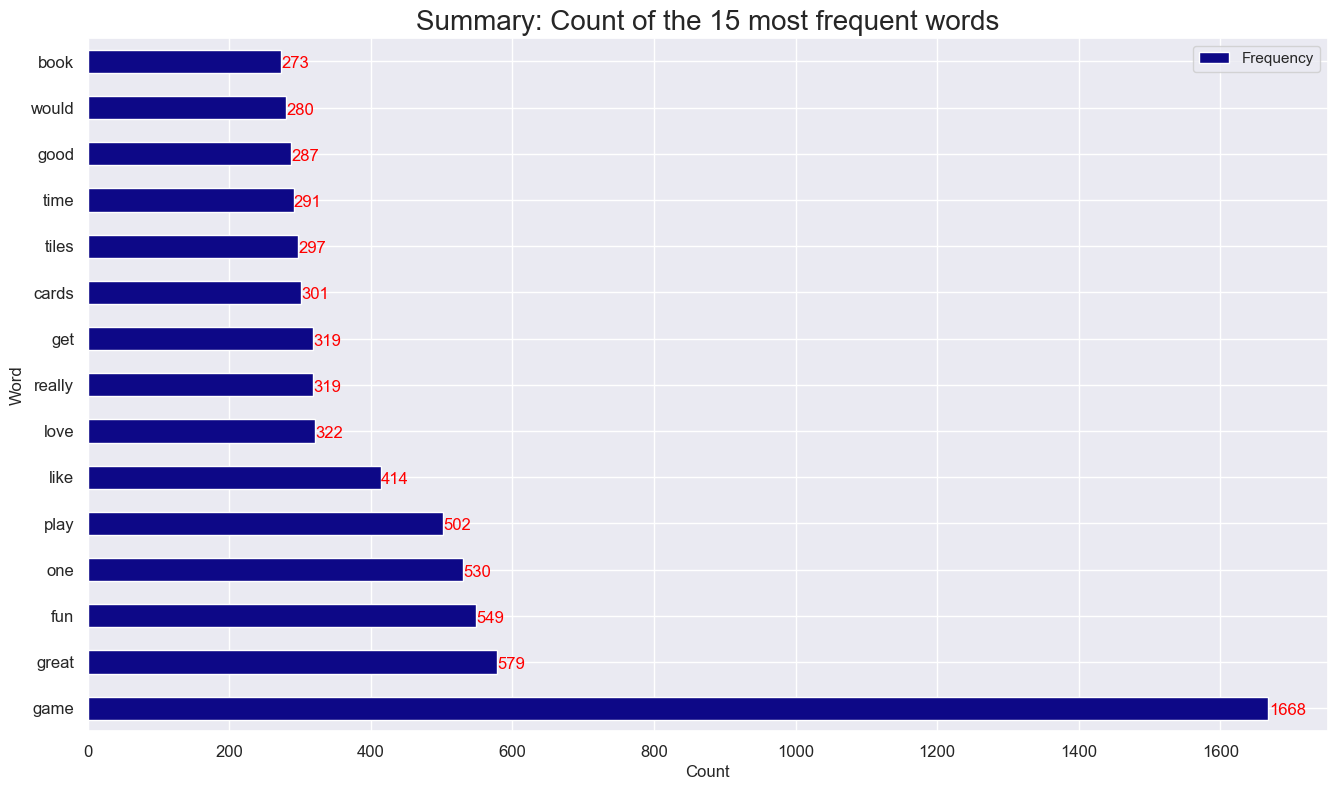

In [99]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [100]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['polarity'] = df4['review'].apply(generate_polarity)

# Work out average polarity
average_polarity = df4['polarity'].mean()

# Preview the result.
print("Average Polarity Reviews:", average_polarity)

Average Polarity Reviews: 0.21224456220153123


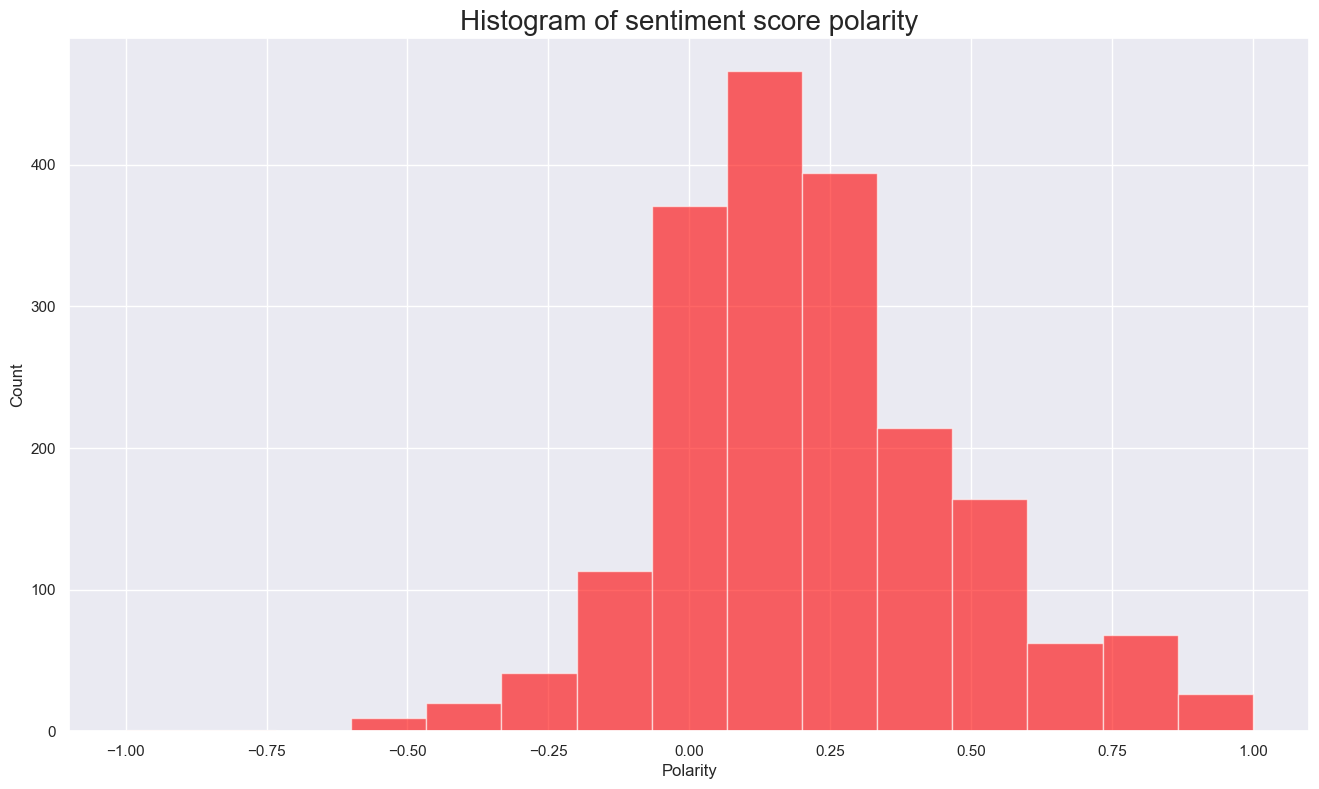

In [101]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative summaries respectively

In [102]:
# Create a DataFrame for most positive summary
positive_sentiment = df4.nlargest(20, 'polarity')
positive_sentiment.head(20)

index                                             review  \
7         7                          came in perfect condition   
164     165                                       awesome book   
193     194                                       awesome gift   
489     496  excellent activity for teaching selfmanagement...   
517     524                        perfect just what i ordered   
583     591                                  wonderful product   
601     609                                 delightful product   
613     621  wonderful for my grandson to learn the resurre...   
782     790                                            perfect   
922     933                                            awesome   
1118   1135                                        awesome set   
1149   1168               best set buy 2 if you have the means   
1158   1177               awesome addition to my rpg gm system   
1279   1301                                        its awesome   
1376   1401  one of the best board games i played in along ...   
1516   1550  my daughter loves her stickers awesome seller ...   
1573   1609  this was perfect to go with the 7 bean bags i ...   
1677   1715                                        awesome toy   
1682   1720  it is the best thing to play with and also min...   
1688   1726                  excellent toy to simulate thought   

                                                 tokens  polarity  
7                        [came, in, perfect, condition]       1.0  
164                                     [awesome, book]       1.0  
193                                     [awesome, gift]       1.0  
489   [excellent, activity, for, teaching, selfmanag...       1.0  
517                   [perfect, just, what, i, ordered]       1.0  
583                                [wonderful, product]       1.0  
601                               [delightful, product]       1.0  
613   [wonderful, for, my, grandson, to, learn, the,...       1.0  
782                                           [perfect]       1.0  
922                                           [awesome]       1.0  
1118                                     [awesome, set]       1.0  
1149     [best, set, buy, 2, if, you, have, the, means]       1.0  
1158       [awesome, addition, to, my, rpg, gm, system]       1.0  
1279                                     [its, awesome]       1.0  
1376  [one, of, the, best, board, games, i, played, ...       1.0  
1516  [my, daughter, loves, her, stickers, awesome, ...       1.0  
1573  [this, was, perfect, to, go, with, the, 7, bea...       1.0  
1677                                     [awesome, toy]       1.0  
1682  [it, is, the, best, thing, to, play, with, and...       1.0  
1688            [excellent, toy, to, simulate, thought]       1.0

In [103]:
# Create a DataFrame for most negative summary
negative_sentiment = df4.nsmallest(20, 'polarity')
negative_sentiment.head(20)

index                                             review  \
207     208  booo unles you are patient know how to measure...   
181     182                  incomplete kit very disappointing   
1766   1804  im sorry i just find this product to be boring...   
362     364  one of my staff will be using this game soon s...   
116     117  i bought this as a christmas gift for my grand...   
226     227  this was a gift for my daughter i found it dif...   
229     230                   i found the directions difficult   
289     290             instructions are complicated to follow   
300     301                                          difficult   
1496   1524                         expensive for what you get   
173     174  i sent this product to my granddaughter the po...   
345     347  my 8 yearold granddaughter and i were very fru...   
531     538  i purchased this on the recommendation of two ...   
305     306                very hard complicated to make these   
421     427                    kids i work with like this game   
430     437  this game although it appears to be like uno a...   
490     497  my son loves playing this game it was recommen...   
795     803                               this game is a blast   
797     806        i bought this for my son he loves this game   
813     824            was a gift for my son he loves the game   

                                                 tokens  polarity  
207   [booo, unles, you, are, patient, know, how, to... -1.000000  
181              [incomplete, kit, very, disappointing] -0.780000  
1766  [im, sorry, i, just, find, this, product, to, ... -0.583333  
362   [one, of, my, staff, will, be, using, this, ga... -0.550000  
116   [i, bought, this, as, a, christmas, gift, for,... -0.500000  
226   [this, was, a, gift, for, my, daughter, i, fou... -0.500000  
229              [i, found, the, directions, difficult] -0.500000  
289        [instructions, are, complicated, to, follow] -0.500000  
300                                         [difficult] -0.500000  
1496                   [expensive, for, what, you, get] -0.500000  
173   [i, sent, this, product, to, my, granddaughter... -0.491667  
345   [my, 8, yearold, granddaughter, and, i, were, ... -0.446250  
531   [i, purchased, this, on, the, recommendation, ... -0.440741  
305          [very, hard, complicated, to, make, these] -0.439583  
421             [kids, i, work, with, like, this, game] -0.400000  
430   [this, game, although, it, appears, to, be, li... -0.400000  
490   [my, son, loves, playing, this, game, it, was,... -0.400000  
795                          [this, game, is, a, blast] -0.400000  
797   [i, bought, this, for, my, son, he, loves, thi... -0.400000  
813   [was, a, gift, for, my, son, he, loves, the, g... -0.400000

In [104]:
# Work out average polarity
average_polarity = df4['polarity'].mean()

# Preview the result.
print("Average Polarity Reviews full text:", average_polarity)

Average Polarity Reviews full text: 0.21224456220153123


## Reviews & Summary

In [105]:
# New df for reviews and summary
df5 = pd.read_csv('reviews2.csv')
df5.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [106]:
# Drop unnecessary columns.
df5 = df5.drop(columns=['gender', 'age', 'remuneration','spending_score', 'loyalty_points', 'education', 'product'])

# View DataFrame.
df5.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [107]:
# Drop duplicates
df5 = df5.drop_duplicates(subset=['review','summary'])

# Preview data.
df5.reset_index(inplace=True)
df5.head()

index                                             review  \
0      0  When it comes to a DM's screen, the space on t...   
1      1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      2  Nice art, nice printing.  Why two panels are f...   
3      3  Amazing buy! Bought it as a gift for our new d...   
4      4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [108]:
# Remove punctuation for reviews
df5['review'] = df5['review'].str.replace('[^\w\s]','')
df5['summary'] = df5['summary'].str.replace('[^\w\s]','')


# Preview the result.
df5.head()

index                                             review  \
0      0  When it comes to a DMs screen the space on the...   
1      1  An Open Letter to GaleForce9\n\nYour unpainted...   
2      2  Nice art nice printing  Why two panels are fil...   
3      3  Amazing buy Bought it as a gift for our new dm...   
4      4  As my review of GF9s previous screens these we...   

                                             summary  
0  The fact that 50 of this space is wasted on ar...  
1  Another worthless Dungeon Masters screen from ...  
2                     pretty but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [109]:
# Transform data to lowercase.
df5['review'] = df5['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df5['summary'] = df5['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))


# Preview the result.
df5.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [110]:
# String all the comments together in a single variable.
all_comments = ''
for i in range(df5.shape[0]):
    # Add each comment.
    all_comments = all_comments + df5['review'][i] + df5['summary'][i]

In [111]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 

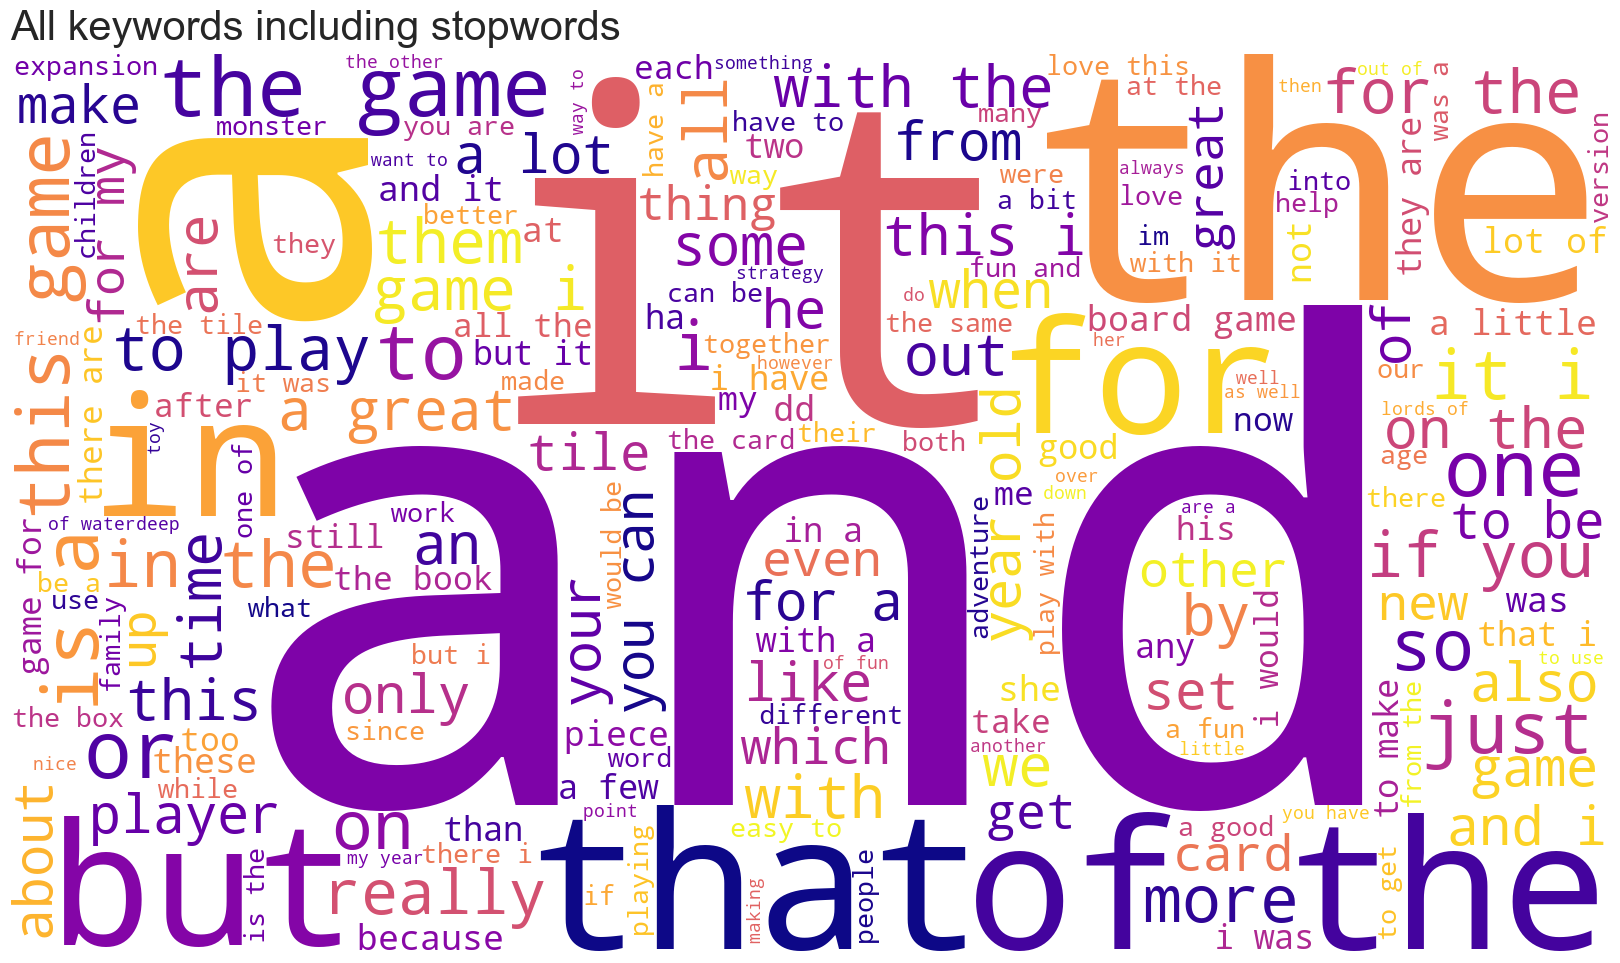

In [112]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('All keywords including stopwords', fontsize=30, loc='left', pad=10)
plt.show()

In [113]:
# Tokenise the words.
df5['tokens'] = df5[['review', 'summary']].apply(lambda row: [word_tokenize(text) for text in row], axis=1)

# Preview data.
df5.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              tokens  
0  [[when, it, comes, to, a, dms, screen, the, sp...  
1  [[an, open, letter, to, galeforce9, your, unpa...  
2  [[nice, art, nice, printing, why, two, panels,...  
3  [[amazing, buy, bought, it, as, a, gift, for, ...  
4  [[as, my, review, of, gf9s, previous, screens,...

In [114]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in tokens if word.isalnum()]

In [115]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens4 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens4_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens4_string = tokens4_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alex_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


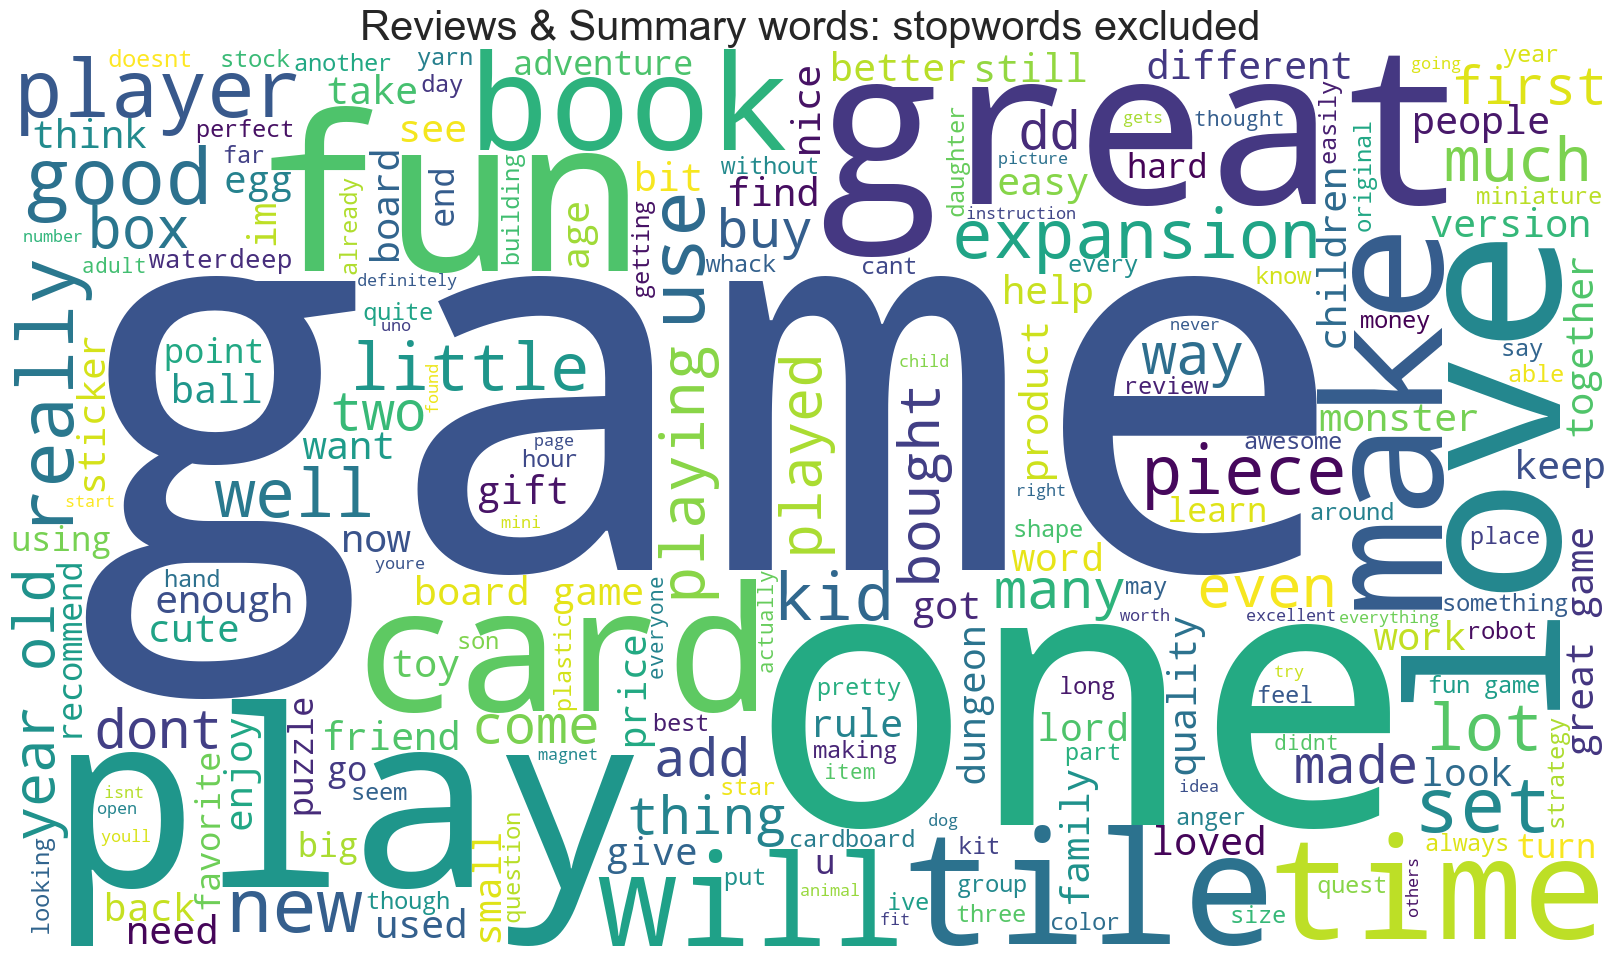

In [116]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', 
                min_font_size = 10).generate(tokens4_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('Reviews & Summary words: stopwords excluded', size=30)
plt.show()

In [117]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens4).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word             
game         1668
great         579
fun           549
one           530
play          502
like          414
love          322
really        319
get           319
cards         301
tiles         297
time          291
good          287
would         280
book          273

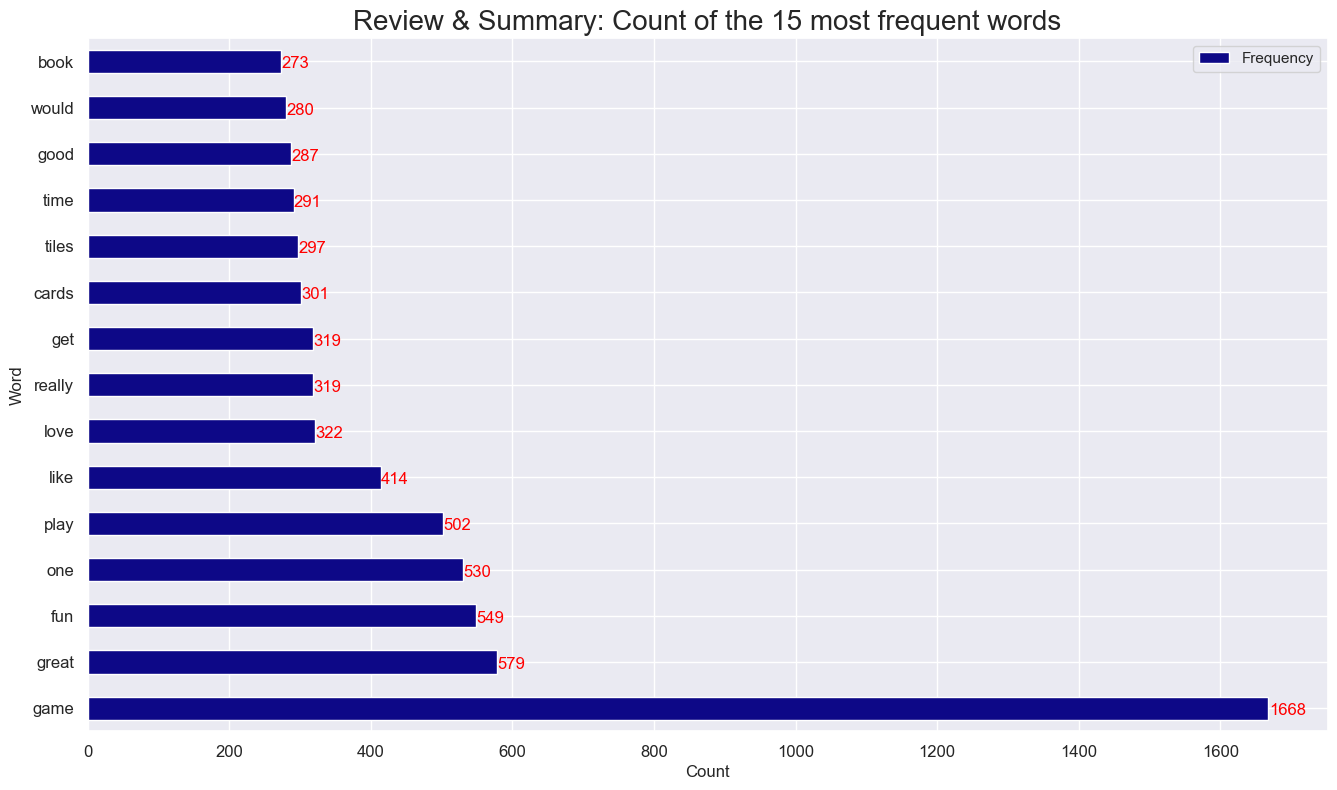

In [118]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review & Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [119]:
# Use textblob to check polarity
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df5['review_polarity'] = df5['review'].apply(generate_polarity)
df5['summary_polarity'] = df5['summary'].apply(generate_polarity)
df5['average_polarity'] = (df5['review_polarity'] + df5['summary_polarity']) / 2

# Preview the result.
df5.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              tokens  review_polarity  \
0  [[when, it, comes, to, a, dms, screen, the, sp...        -0.036111   
1  [[an, open, letter, to, galeforce9, your, unpa...         0.035952   
2  [[nice, art, nice, printing, why, two, panels,...         0.116640   
3  [[amazing, buy, bought, it, as, a, gift, for, ...         0.578788   
4  [[as, my, review, of, gf9s, previous, screens,...        -0.316667   

   summary_polarity  average_polarity  
0              0.15          0.056944  
1             -0.80         -0.382024  
2              0.00          0.058320  
3              0.00          0.289394  
4              0.00         -0.158333

In [120]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

df5['review_subjectivity'] = df5['review'].apply(generate_subjectivity)
df5['summary_subjectivity'] = df5['summary'].apply(generate_subjectivity)
df5['average_subjectivity'] = (df5['review_subjectivity'] + df5['summary_subjectivity']) / 2

# Preview the result.
df5.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              tokens  review_polarity  \
0  [[when, it, comes, to, a, dms, screen, the, sp...        -0.036111   
1  [[an, open, letter, to, galeforce9, your, unpa...         0.035952   
2  [[nice, art, nice, printing, why, two, panels,...         0.116640   
3  [[amazing, buy, bought, it, as, a, gift, for, ...         0.578788   
4  [[as, my, review, of, gf9s, previous, screens,...        -0.316667   

   summary_polarity  average_polarity  review_subjectivity  \
0              0.15          0.056944             0.486111   
1             -0.80         -0.382024             0.442976   
2              0.00          0.058320             0.430435   
3              0.00          0.289394             0.784848   
4              0.00         -0.158333             0.316667   

   summary_subjectivity  average_subjectivity  
0              0.500000              0.493056  
1              0.900000              0.671488  
2              0.733333              0.581884  
3              0.000000              0.392424  
4              0.000000              0.158333

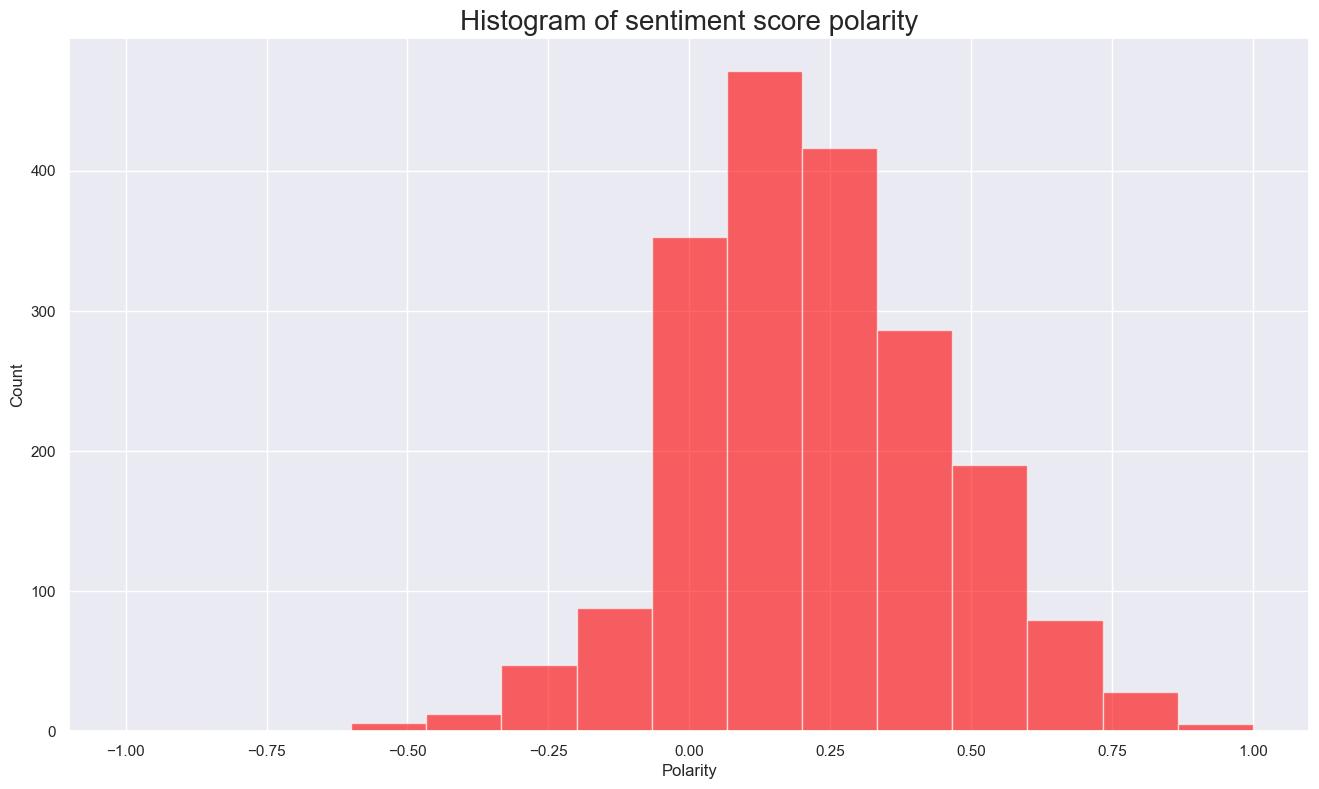

In [121]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['average_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

In [122]:
# Work out average polarity
average_polarity = df5['average_polarity'].mean()

# Preview the result.
print("Average Polarity:", average_polarity)

Average Polarity: 0.21824171184456587


In [123]:
# Work out average subjectivity
average_subjectivity = df5['average_subjectivity'].mean()

# Preview the result.
print("Average Subjectivity:", average_subjectivity)

Average Subjectivity: 0.4496458348074076


# Filter reviews & summary for target remuneration group
Remuneration £57-112k customer group 

In [124]:
# New df for reviews and summary
df6 = pd.read_csv('reviews2.csv')
df6.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [125]:
# Drop unnecessary columns.
df6 = df6.drop(columns=['gender', 'age', 'spending_score', 'loyalty_points', 'education', 'product'])

# View DataFrame.
df6.head()

remuneration                                             review  \
0         12.30  When it comes to a DM's screen, the space on t...   
1         12.30  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         13.12  Nice art, nice printing.  Why two panels are f...   
3         13.12  Amazing buy! Bought it as a gift for our new d...   
4         13.94  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [126]:
# Check how many rows with full df
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   remuneration  2000 non-null   float64
 1   review        2000 non-null   object 
 2   summary       2000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 47.0+ KB


In [127]:
# Filter for Remuneration £57-112k customer group 
df6 = df6[(df6['remuneration'] >= 57) & (df6['remuneration'] <= 112)]

# Check how many rows remaining
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 124 to 1999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   remuneration  680 non-null    float64
 1   review        680 non-null    object 
 2   summary       680 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.2+ KB


In [128]:
# Drop duplicates
df6 = df6.drop_duplicates(subset=['review','summary'])

# Preview data.
df5.reset_index(inplace=True)
df5.head()

level_0  index                                             review  \
0        0      0  when it comes to a dms screen the space on the...   
1        1      1  an open letter to galeforce9 your unpainted mi...   
2        2      2  nice art nice printing why two panels are fill...   
3        3      3  amazing buy bought it as a gift for our new dm...   
4        4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              tokens  review_polarity  \
0  [[when, it, comes, to, a, dms, screen, the, sp...        -0.036111   
1  [[an, open, letter, to, galeforce9, your, unpa...         0.035952   
2  [[nice, art, nice, printing, why, two, panels,...         0.116640   
3  [[amazing, buy, bought, it, as, a, gift, for, ...         0.578788   
4  [[as, my, review, of, gf9s, previous, screens,...        -0.316667   

   summary_polarity  average_polarity  review_subjectivity  \
0              0.15          0.056944             0.486111   
1             -0.80         -0.382024             0.442976   
2              0.00          0.058320             0.430435   
3              0.00          0.289394             0.784848   
4              0.00         -0.158333             0.316667   

   summary_subjectivity  average_subjectivity  
0              0.500000              0.493056  
1              0.900000              0.671488  
2              0.733333              0.581884  
3              0.000000              0.392424  
4              0.000000              0.158333

In [129]:
# Use textblob to check sentiment
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df6['review_polarity'] = df6['review'].apply(generate_polarity)
df6['summary_polarity'] = df6['summary'].apply(generate_polarity)
df6['average_polarity'] = (df6['review_polarity'] + df6['summary_polarity']) / 2

# Preview the result.
df6.head()

remuneration                                             review  \
124         57.40  got it for my 8 year old but it was very small...   
125         57.40  Nice book but it was so small.  I should have ...   
126         58.22  My 5 year old son loves robots, and he really ...   
127         58.22  ... In a little package. My 6 year old loved m...   
128         58.22  love this little book for an extra little fun ...   

                       summary  review_polarity  summary_polarity  \
124                     its ok        -0.106250          0.500000   
125                       Nice         0.132812          0.600000   
126  What a fun activity book!         0.154750          0.375000   
127             Lots of fun...         0.154167          0.300000   
128            fun cheap silly         0.027232          0.066667   

     average_polarity  
124          0.196875  
125          0.366406  
126          0.264875  
127          0.227083  
128          0.046949

In [130]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

df6['review_subjectivity'] = df6['review'].apply(generate_subjectivity)
df6['summary_subjectivity'] = df6['summary'].apply(generate_subjectivity)
df6['average_subjectivity'] = (df6['review_subjectivity'] + df6['summary_subjectivity']) / 2

# Preview the result.
df6.head()

remuneration                                             review  \
124         57.40  got it for my 8 year old but it was very small...   
125         57.40  Nice book but it was so small.  I should have ...   
126         58.22  My 5 year old son loves robots, and he really ...   
127         58.22  ... In a little package. My 6 year old loved m...   
128         58.22  love this little book for an extra little fun ...   

                       summary  review_polarity  summary_polarity  \
124                     its ok        -0.106250          0.500000   
125                       Nice         0.132812          0.600000   
126  What a fun activity book!         0.154750          0.375000   
127             Lots of fun...         0.154167          0.300000   
128            fun cheap silly         0.027232          0.066667   

     average_polarity  review_subjectivity  summary_subjectivity  \
124          0.196875             0.455000              0.500000   
125          0.366406             0.400000              1.000000   
126          0.264875             0.504000              0.200000   
127          0.227083             0.602778              0.200000   
128          0.046949             0.357143              0.591667   

     average_subjectivity  
124              0.477500  
125              0.700000  
126              0.352000  
127              0.401389  
128              0.474405

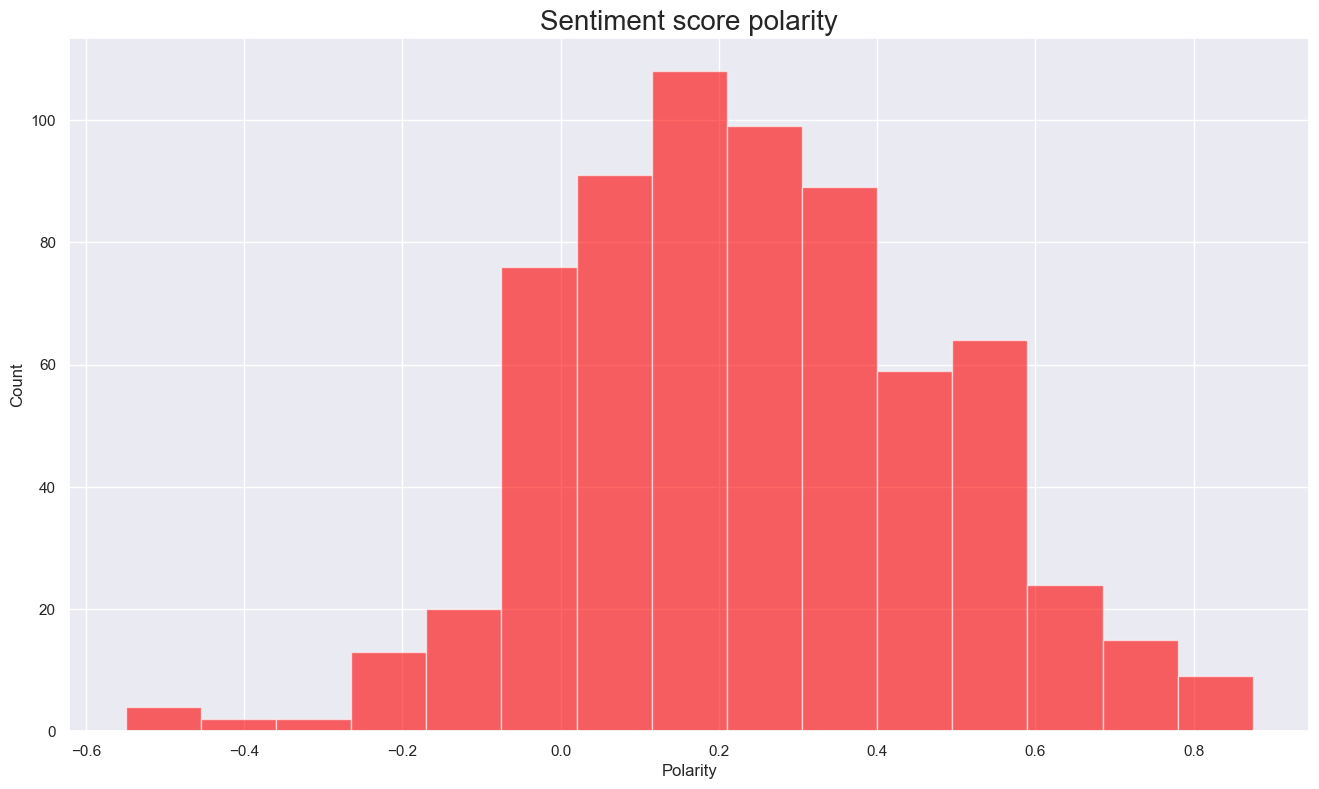

In [131]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df6['average_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment score polarity', fontsize=20)

plt.show()

In [132]:
# Work out average polarity
average_polarity = df6['average_polarity'].mean()

# Preview the result.
print("Average Polarity:", average_polarity)

Average Polarity: 0.24131330677306917


In [133]:
# Work out average subjectivity
average_subjectivity = df6['average_subjectivity'].mean()

# Preview the result.
print("Average Subjectivity:", average_subjectivity)

Average Subjectivity: 0.4533071691978685


In [134]:
# Create a DataFrame for most positive summary
positive_sentiment = df6.nlargest(20, 'average_polarity')
positive_sentiment.head(20)

remuneration                                             review  \
1543         71.34  Grand daughter loves stickers and she loves Pe...   
1547         72.16                                      Good quality!   
1550         72.16  My daughter loves her stickers! Awesome seller...   
1696         84.46                             Great education "toy"!   
747          63.14  My kids love these cards and there are so many...   
961          64.78  Bought this because I wanted it. All these D&D...   
1536         82.82  My granddaughter loves these.  So happy to fin...   
724          57.40  I was impressed with the quality of this puzzl...   
1508         63.96  I bought this as a Christmas gift for my great...   
155          63.96  This makes a great gift for anyone who loves S...   
163          66.42  This was a Christmas present for a nephew who ...   
1150         63.96  Great price, arrived on time with no damage. W...   
1529         76.26  Excellent stickers.  My grand daughter loves P...   
1136         59.86  The box was in good condition, and very full o...   
731          58.22  My son (2.5 yr old) loves it very much, the be...   
953          63.96  A great gaming set for beginner GM's. If you a...   
1165         69.70  The tiles are just as i hoped they would be. T...   
582          80.36  Precious and perfect way to read through the s...   
756          63.96  perfect tool for learning how to tell time one...   
938          60.68  My husband bought this so we as a family could...   

                                                summary  review_polarity  \
1543  ... loves stickers and she loves Peppa so this...         0.750000   
1547                                              good!         0.875000   
1550                          Awesome seller! Thank You         0.750000   
1696                                      Kids love it!         1.000000   
747                                              Great!         0.608333   
961                      All these D&D games are great.         0.800000   
1536           So happy to find Peppa Pig items for her         0.800000   
724                                    Excellent puzzle         0.577778   
1508                                     Wonderful gift         0.562500   
155                                           Beautiful         0.658333   
163                     He was very happy with his gift         0.500000   
1150                                      Good addition         0.800000   
1529  Excellent stickers. My grand daughter loves Pe...         0.750000   
1136                                          Great Buy         0.689583   
731                        the best feedback i can have         0.453333   
953                A great gaming set for beginner GM's         0.644444   
1165                    very satisfied with the quality         0.780000   
582                                               Love!         0.791667   
756   perfect tool for learning how to tell time one...         0.413333   
938                                    Great purchase!!         0.402250   

      summary_polarity  average_polarity  review_subjectivity  \
1543             1.000          0.875000             1.000000   
1547             0.875          0.875000             0.600000   
1550             1.000          0.875000             1.000000   
1696             0.625          0.812500             0.750000   
747              1.000          0.804167             0.670833   
961              0.800          0.800000             0.750000   
1536             0.800          0.800000             1.000000   
724              1.000          0.788889             0.677778   
1508             1.000          0.781250             0.575000   
155              0.850          0.754167             0.554167   
163              1.000          0.750000             0.500000   
1150             0.700          0.750000             0.750000   
1529             0.750        

In [135]:
# Create a DataFrame for most negative summary
negative_sentiment = df6.nsmallest(20, 'average_polarity')
negative_sentiment.head(20)

remuneration                                             review  \
364          69.70  One of my staff will be using this game soon, ...   
1166         70.52  before this I hated running any RPG campaign d...   
182          80.36               Incomplete kit!  Very disappointing!   
178          76.26  At age 31 I found these very difficult to make...   
363          66.42  I found that this card game does the opposite ...   
793          92.66  My mom already owned an Acquire game but she a...   
144          63.14  MY kids grew up with a peg bench and hammer an...   
989          84.46  If you, like me, used to play D&D, but now you...   
975          72.16  A fantastic purchase. 40 Miniatures for just u...   
1524         72.16                        Expensive for what you get.   
174          72.16  I sent this product to my granddaughter. The p...   
525          57.40  This is a fun card game for helping youth talk...   
1502         63.96  There are way too many similar looking tiles! ...   
347          63.14  My 8 year-old granddaughter and I were very fr...   
538          60.68  I purchased this on the recommendation of two ...   
359          63.96  This is horrible! The directions are very hard...   
173          71.34  Horrible!\nNothing more to say\nWould give zer...   
1359         63.96  Excelent expansion, the game is nothing witout...   
530          58.22  My 12 year old son enjoyed the game - but it i...   
593          92.66  If I could give this egg zero stars I would. I...   

                                                summary  review_polarity  \
364                                  Anger Control game        -0.550000   
1166  before this I hated running any RPG campaign d...        -0.133333   
182                                     INCOMPLETE KIT!        -0.975000   
178   At age 31 I found these very difficult to make...        -0.275000   
363   Promotes anger instead of teaching calming met...        -0.126190   
793                                        Disappointed        -0.046364   
144                                        Disappointed         0.108173   
989                           like me, used to play D&D        -0.625000   
975   A bargain for the miniatures alone! The game i...        -0.008854   
1524                                          Two Stars        -0.500000   
174                                      Faulty Product        -0.491667   
525                        Fun way to talk about anger!        -0.200000   
1502            Too complicated, even for an adult!  :(        -0.090476   
347                                       FRUSTATING!!!        -0.452500   
538                                            Hmmm????        -0.440741   
359                                Not worth the money!        -0.237083   
173   Horrible! Nothing more to say Would give zero ...        -0.166667   
1359                                         Five Stars        -0.400000   
530                                  Anger Control Game         0.151042   
593             Too hard for children or adults to open        -0.236458   

      summary_polarity  average_polarity  review_subjectivity  \
364          -0.550000         -0.550000             0.300000   
1166         -0.900000         -0.516667             0.733333   
182           0.000000         -0.487500             0.910000   
178          -0.650000         -0.462500             0.600000   
363          -0.700000         -0.413095             0.488889   
793          -0.750000         -0.398182             0.450455   
144          -0.750000         -0.320913             0.524519   
989           0.000000         -0.312500             0.400000   
975          -0.500000         -0.254427             0.527083   
1524          0.000000         -0.250000             0.700000   
174           0.000000         -0.245833             0.433333   
525          -0.287500         -0.243750             0.300000   
1502         -0.375000        

In [136]:
# create csv of top 20 positive reviews for marketing
# File path for the CSV file
file_path = 'positive_sentiment.csv'

# Write data to the CSV file
positive_sentiment.to_csv(file_path, index=False)

In [137]:
# create csv of top 20 negative reviews for marketing
# File path for the CSV file
file_path2 = 'negative_sentiment.csv'

# Write data to the CSV file
negative_sentiment.to_csv(file_path2, index=False)

## 7. Discuss: Insights and observations

***Your observations here...***

**See README file in github for full summary**
- need more info on the reviews - time period, sample type
- may be bias in data eg re online gamers more likely to leave a review online than book purchaser?
- 2000 products included in data
- 56% female

Summary
- avg polarity on summary is 0.27, on reviews is 0.21 and overall 0.22
- Wordcloud and frequency shows games above books in product interest
- kid in wordcloud shows customers are buying for kids - growinhg market
- positive summaries could be used in marketing campaigns to attract similar customers
- negative summaries could be used to review named products


- Target customer segment is 0.24 - indicating performing better for target segment than main market
- Subjectivity is 0.45 for segment and all data

Next steps 
- Review polarity at regular intervals to monitor sentiment eg every 6 months using 0.22 as the benchmark and 0.24 for target group
- filter for Proper Names to look for specific products
- split by age groups